In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
#Modification des affichages de colonnes, lignes et largeurs de colonnes pour avoir un maximum d'information
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', -1)

<ipython-input-13-358864a12876>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [14]:
data = pd.read_csv('en.openfoodfacts.org.products_cleaned2.csv')

C:\Users\matth\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [15]:
data.head()

,code,url,creator,product_name,quantity,packaging,packaging_tags,brands,categories,origins_tags,manufacturing_places_tags,labels_tags,ingredients_text,traces_tags,additives_n,additives_tags,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,created,last_modified
0,0000000000017,http://world-en.openfoodfacts.org/product/0000000000017/vitoria-crackers,kiliweb,Vitória crackers,NaN,NaN,autre,NaN,NaN,autre,autre,autre,NaN,autre,NaN,autre,NaN,autre,NaN,1.0,autre,NaN,NaN,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/000/000/000/0017/front_fr.4.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0017/front_fr.4.200.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0017/ingredients_fr.9.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0017/ingredients_fr.9.200.jpg,NaN,NaN,NaN,1569.0,7.0,3.08,70.1,15.0,7.8,1.40,0.560,NaN,2018-06-15 10:38:00,2019-06-25 11:55:18
1,0000000000031,http://world-en.openfoodfacts.org/product/0000000000031/cacao,isagoofy,Cacao,130 g,NaN,autre,NaN,NaN,autre,autre,autre,NaN,autre,NaN,autre,NaN,autre,NaN,1.0,autre,NaN,NaN,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/000/000/000/0031/front_fr.3.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0031/front_fr.3.200.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-13 21:06:14,2018-10-13 21:06:57
2,0000000000100,http://world-en.openfoodfacts.org/product/0000000000100/moutarde-au-mout-de-raisin-courte-paille,del51,moutarde au moût de raisin,100g,NaN,autre,courte paille,"Epicerie, Condiments, Sauces, Moutardes",autre,autre,made in france,eau graines de téguments de moutarde vinaigre de vin rouge sel vin rouge sucre moût de raisin (6.2%) oignons colorants extraits de carotte et extrait de paprika huile de tournesol son de moutarde sel (cette _moutarde_ uniquement disponible chez courte paille),autre,0.0,autre,0.0,autre,0.0,1.0,autre,18.0,d,NaN,Fat and sauces,Dressings and sauces,Mustards,https://static.openfoodfacts.org/images/products/000/000/000/0100/front.3.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0100/front.3.200.jpg,NaN,NaN,NaN,NaN,NaN,936.0,8.2,2.20,29.0,22.0,5.1,4.60,1.840,18.0,2015-10-11 14:09:21,2015-10-12 14:13:32
3,00000000001111111111,http://world-en.openfoodfacts.org/product/00000000001111111111/sfiudwx-watt,openfoodfacts-contributors,Sfiudwx,dgesc,NaN,autre,Watt,Xsf,autre,autre,autre,NaN,autre,NaN,autre,NaN,autre,NaN,1.0,autre,NaN,NaN,NaN,unknown,unknown,fr:xsf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-08 18:56:13,2019-06-08 18:56:13
4,0000000000123,http://world-en.openfoodfacts.org/product/0000000000123/sauce-sweety-chili-0,kiliweb,Sauce Sweety chili 0%,NaN,NaN,autre,NaN,NaN,autre,autre,autre,NaN,autre,NaN,autre,NaN,autre,NaN,1.0,autre,NaN,NaN,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/000/000/000/0123/front_fr.4.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0123/front_fr.4.200.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0123/ingredients_fr.7.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0123/ingredients_fr.7.200.jpg,NaN,NaN,21.0,88.0,0.0,0.00,4.8,0.4,0.2,2.04,0.816,NaN,2018-08-31 17:53:02,2018-08-31 17:53:06


In [16]:
data.shape

(627815, 45)

In [17]:
if 'Unnamed: 0' in data.columns:
    data.drop('Unnamed: 0', axis=1, inplace=True)

In [18]:
data.shape

(627815, 45)

In [19]:
data.isna().sum()

code                                          0     
url                                           0     
creator                                       1     
product_name                                  18963 
quantity                                      430509
packaging                                     500206
packaging_tags                                0     
brands                                        301733
categories                                    354294
origins_tags                                  0     
manufacturing_places_tags                     0     
labels_tags                                   0     
ingredients_text                              441344
traces_tags                                   0     
additives_n                                   442314
additives_tags                                0     
ingredients_from_palm_oil_n                   441461
ingredients_from_palm_oil_tags                0     
ingredients_that_may_be_from_palm_oil_n       

# Correction des types

In [20]:
data.dtypes

code                                          object 
url                                           object 
creator                                       object 
product_name                                  object 
quantity                                      object 
packaging                                     object 
packaging_tags                                object 
brands                                        object 
categories                                    object 
origins_tags                                  object 
manufacturing_places_tags                     object 
labels_tags                                   object 
ingredients_text                              object 
traces_tags                                   object 
additives_n                                   float64
additives_tags                                object 
ingredients_from_palm_oil_n                   float64
ingredients_from_palm_oil_tags                object 
ingredients_that_may_be_from

In [21]:
types = pd.read_csv('dtypes.csv')
types.sample(5)

,index,dtypes
32,image_nutrition_small_url,object
20,ingredients_that_may_be_from_palm_oil_tags,category
14,additives_n,float64
6,packaging_tags,category
21,nutriscore_score,float64


In [22]:
for column in data.columns:
    column_type = types[types['index'].str.match(column)]['dtypes'].values[0]
    data[column] = data[column].astype(column_type)

In [23]:
data.dtypes

code                                          object        
url                                           object        
creator                                       object        
product_name                                  object        
quantity                                      object        
packaging                                     object        
packaging_tags                                category      
brands                                        object        
categories                                    object        
origins_tags                                  category      
manufacturing_places_tags                     category      
labels_tags                                   category      
ingredients_text                              object        
traces_tags                                   category      
additives_n                                   float64       
additives_tags                                category      
ingredients_from_palm_oi

# QUESTION 2 : Analyse univariée : Tout au long de l’analyse, produire des visualisations afin de mieux comprendre les données. Effectuer une analyse univariée pour chaque variable intéressante, afin de synthétiser son comportement.

# Analyse univariée

# Distribution

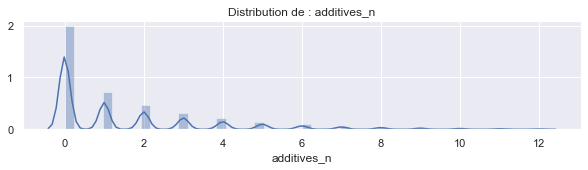

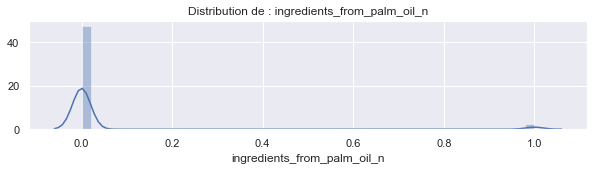

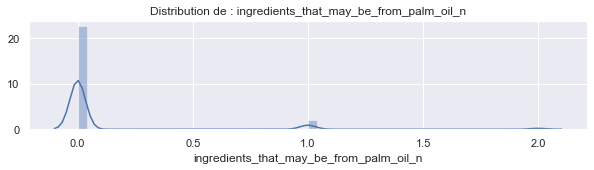

C:\Users\matth\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


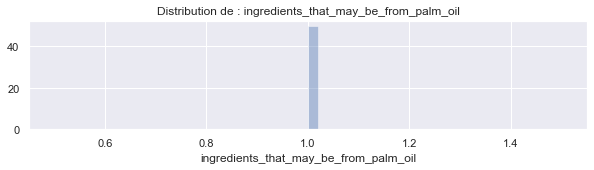

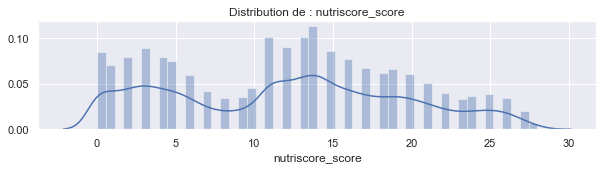

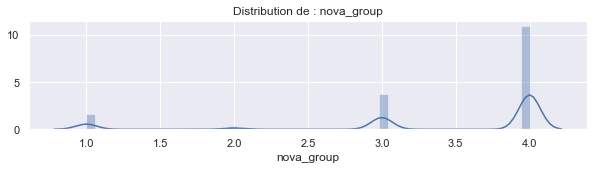

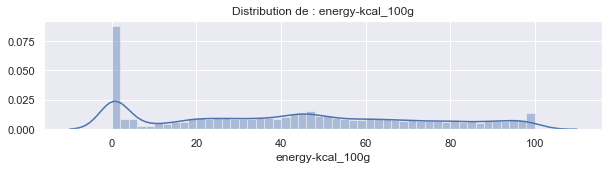

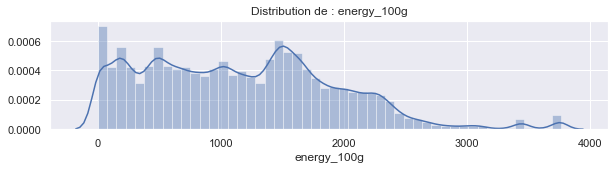

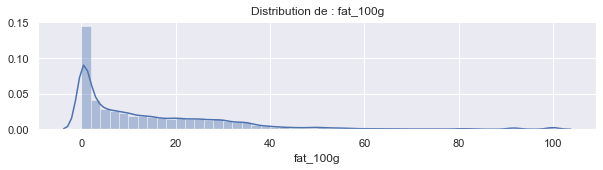

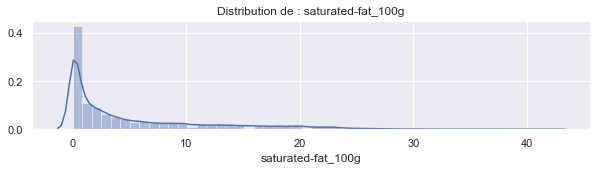

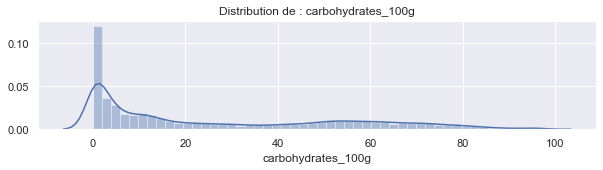

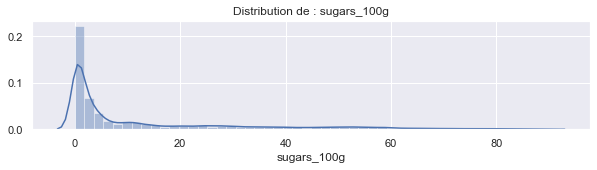

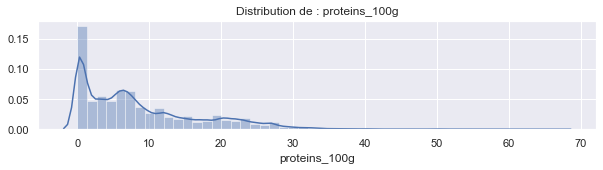

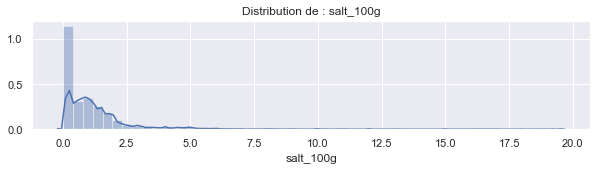

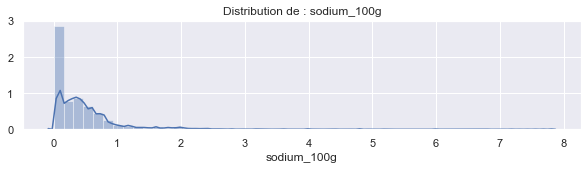

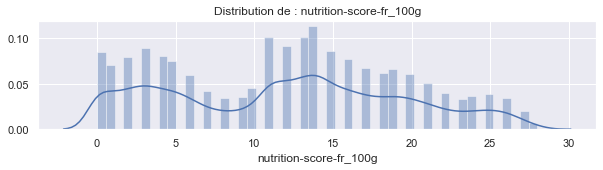

In [24]:
numeric_columns = data.select_dtypes(include = ['int32','float64']).columns
for column in numeric_columns:
    plt.figure(figsize = (10,2))
    sns.set(font_scale=1)
    sns.distplot(data[column], bins=50)
    chaine = 'Distribution de : ' + column
    plt.title(chaine)
    plt.xlabel(column)
    plt.show()

In [25]:
numeric_columns

Index(['additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil', 'nutriscore_score',
       'nova_group', 'energy-kcal_100g', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g'],
      dtype='object')

# Boîtes à moustaches

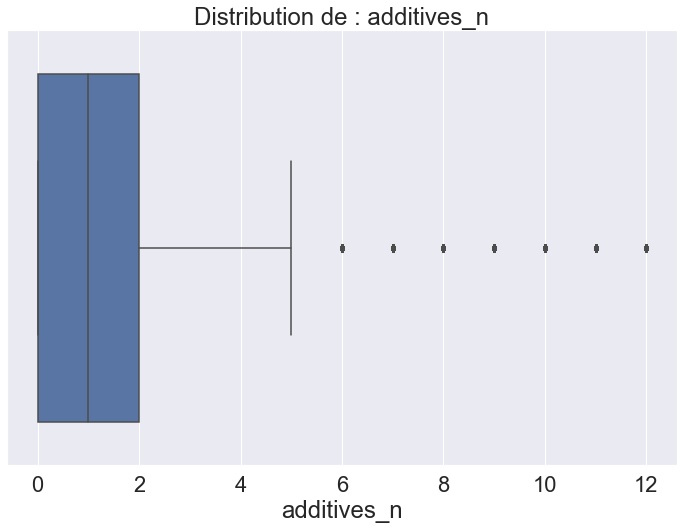

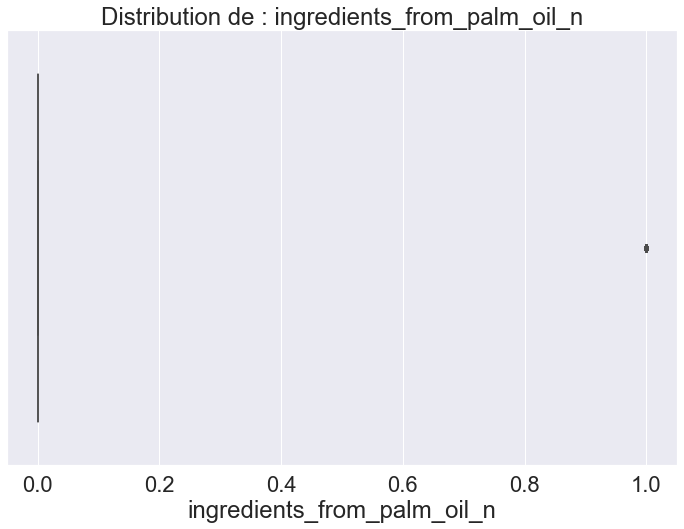

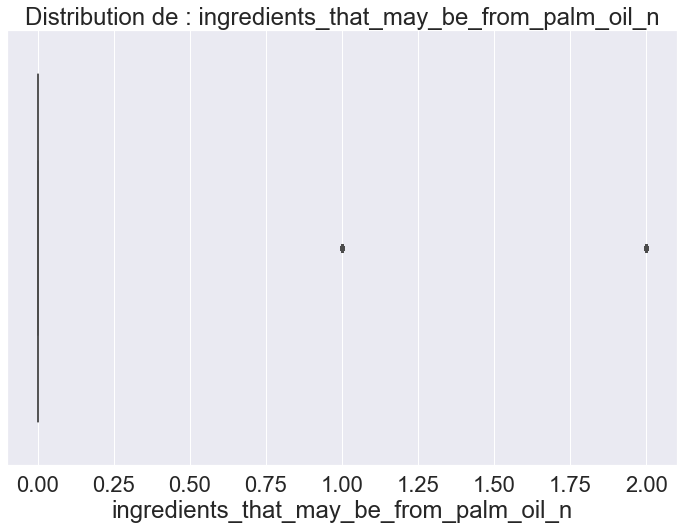

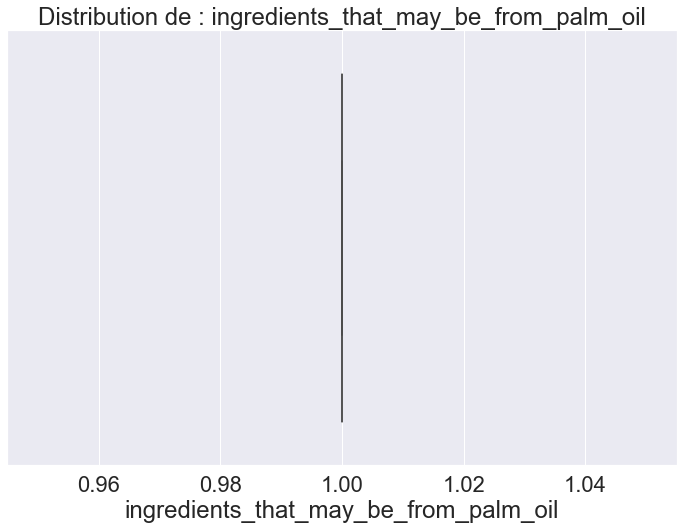

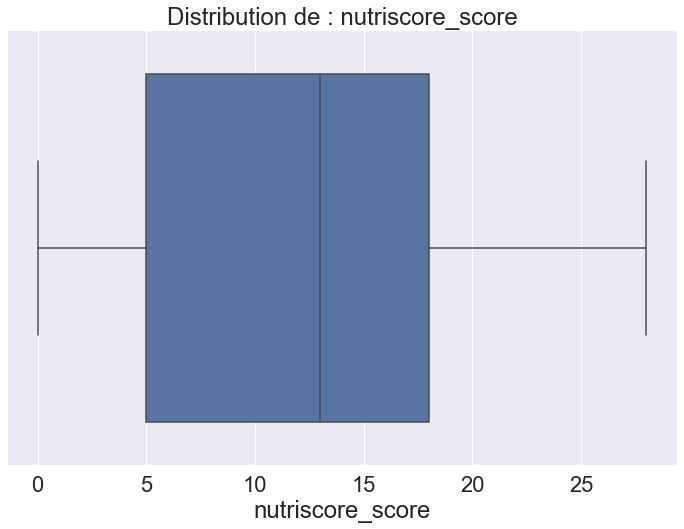

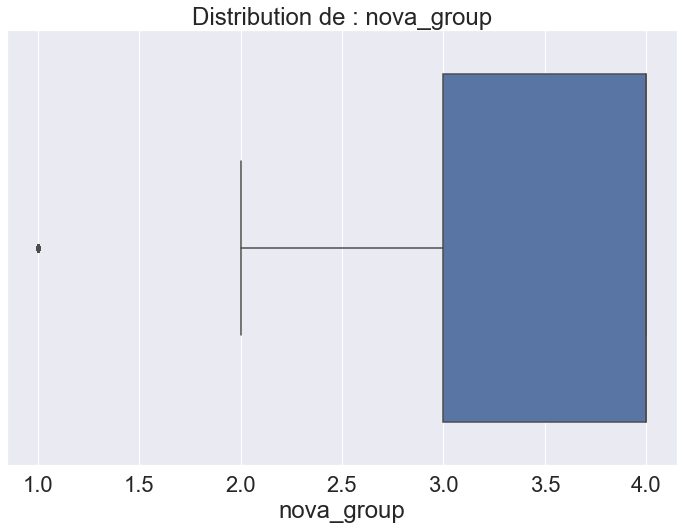

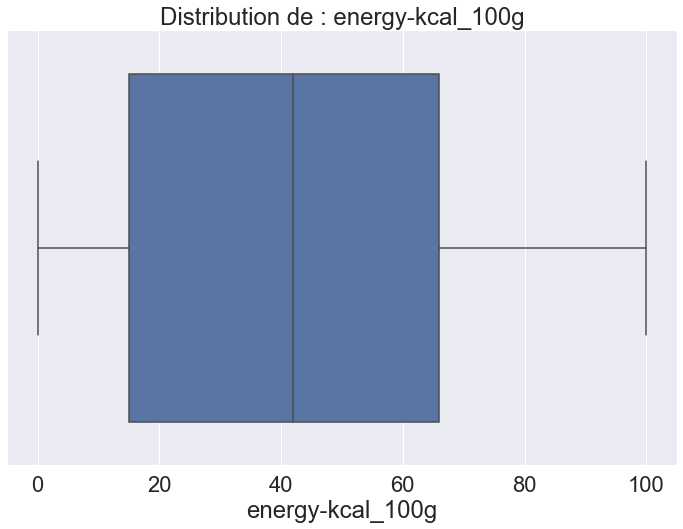

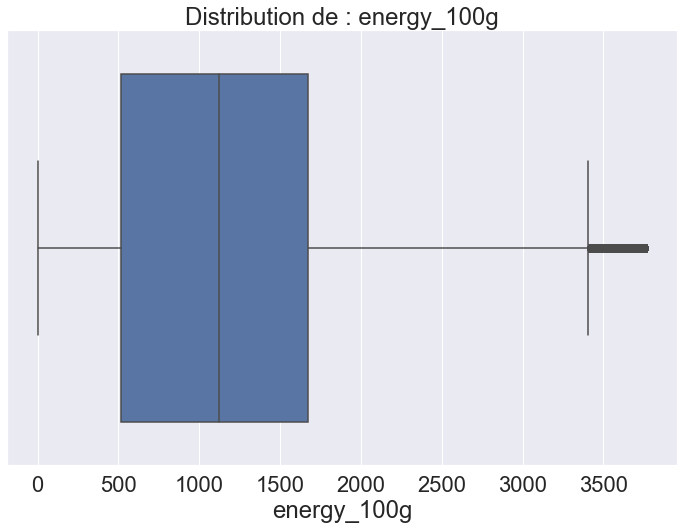

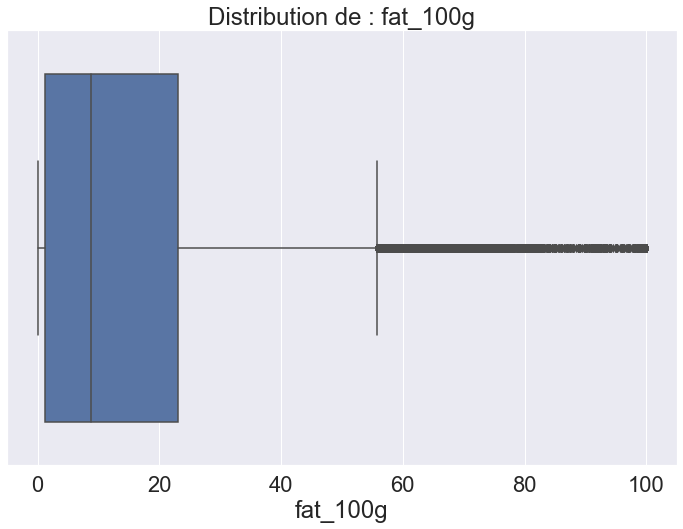

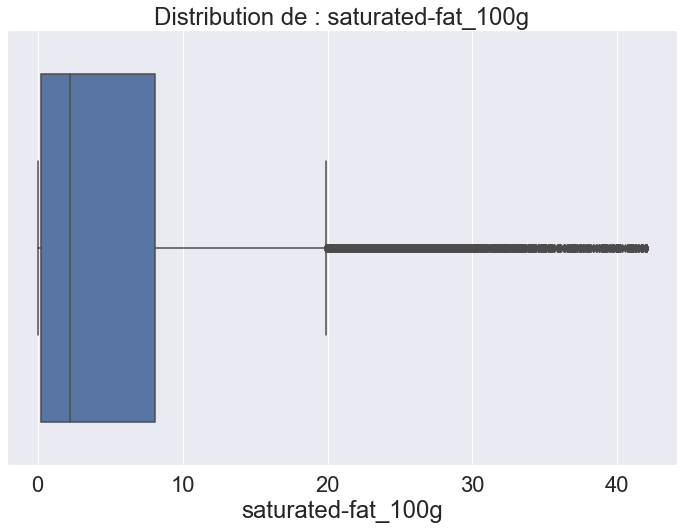

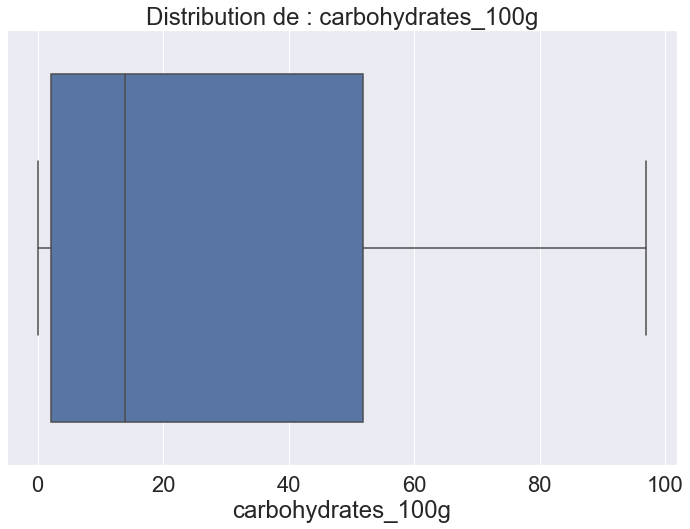

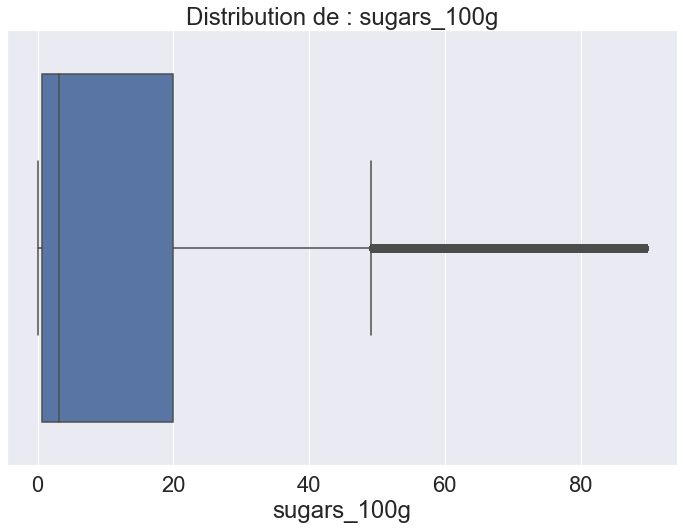

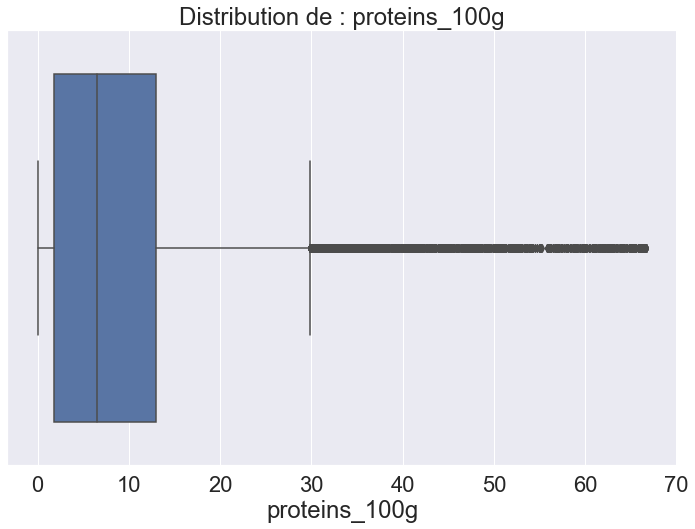

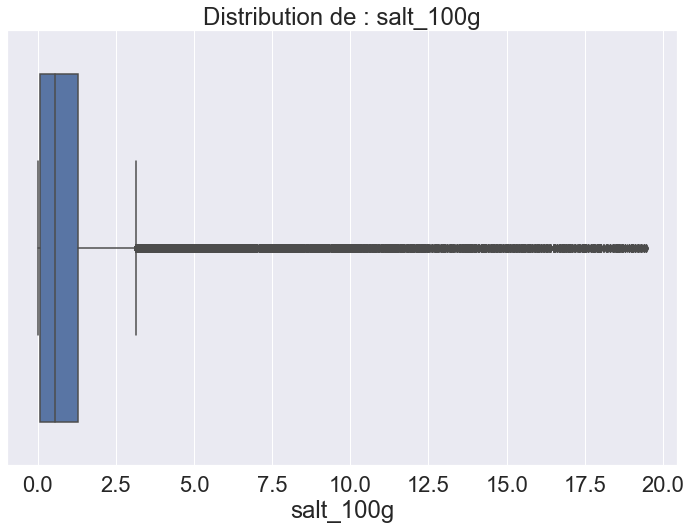

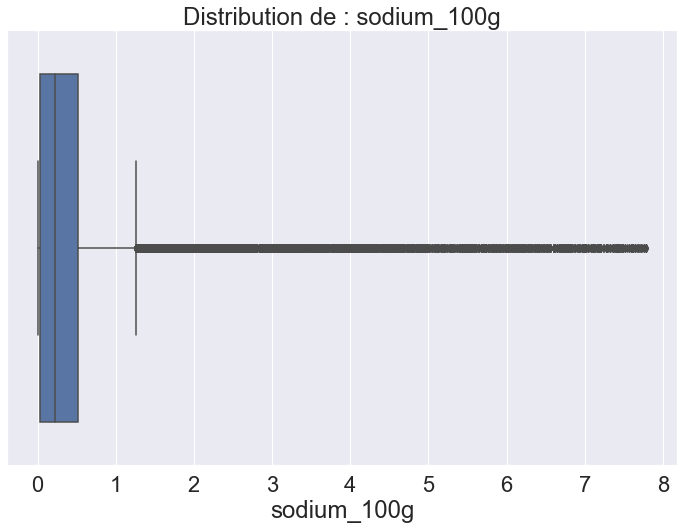

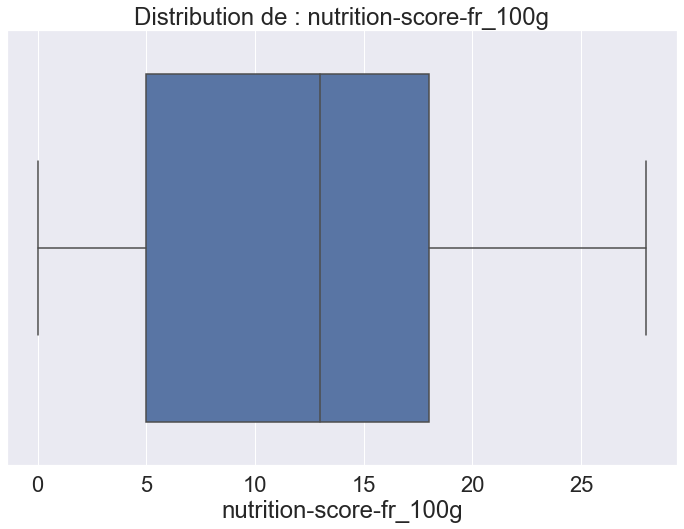

In [26]:
numeric_columns = data.select_dtypes(include = ['int32','float64']).columns
sns.set(font_scale=2)
for column in numeric_columns:
    plt.figure(figsize = (12,8))
    
    sns.boxplot(data[column])
    chaine = 'Distribution de : ' + column
    plt.title(chaine)
    plt.xlabel(column)
    plt.show()
sns.set(font_scale=1)

# Barplots

In [27]:
categories_columns = data.select_dtypes(include = ['category']).columns

In [28]:
categories_columns

Index(['packaging_tags', 'origins_tags', 'manufacturing_places_tags',
       'labels_tags', 'traces_tags', 'additives_tags',
       'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil_tags'],
      dtype='object')

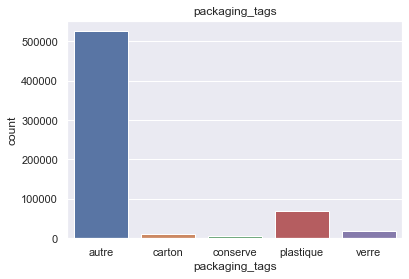

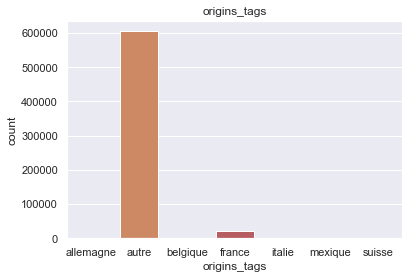

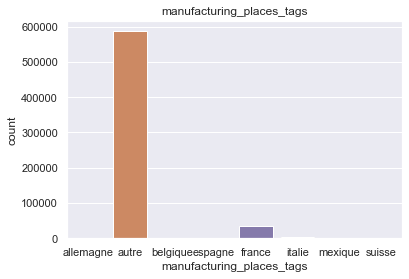

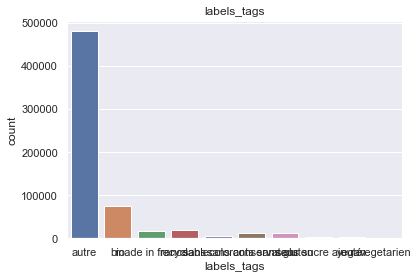

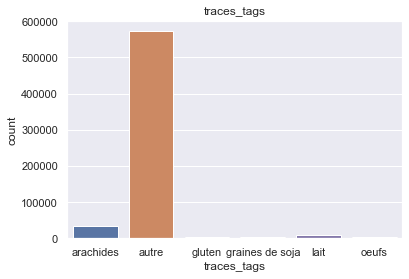

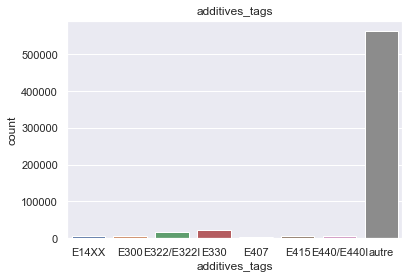

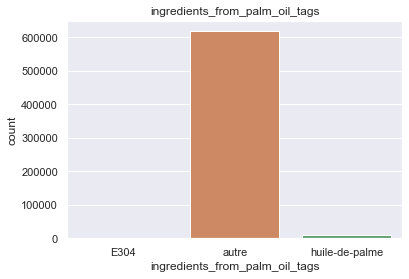

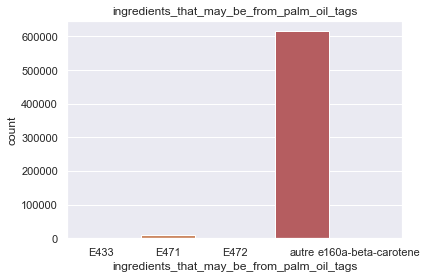

In [29]:
for column in categories_columns:
    sns.countplot(x = data[column], data = data)
    plt.title(column)
    plt.show()
    print('')

In [30]:
#for column in data.select_dtypes(include = ['object']).columns:
#    sns.countplot(x = data[column], data = data)
#    plt.show()
#    print('')

# Occurences des mots

In [31]:
object_columns = data.select_dtypes(include = ['object']).columns

In [32]:
object_columns = ['code',
                 'url',
                 'creator',
                 'product_name',
                  'packaging',
                  'brands',
                  'categories',
                  'ingredients_text',
                  'nutriscore_grade',
                  'pnns_groups_1',
                  'pnns_groups_2',
                  'main_category_en', 
                  'image_url',
                  'image_small_url',
                  'image_ingredients_url',
                  'image_ingredients_small_url',
                  'image_nutrition_url',
                  'image_nutrition_small_url']

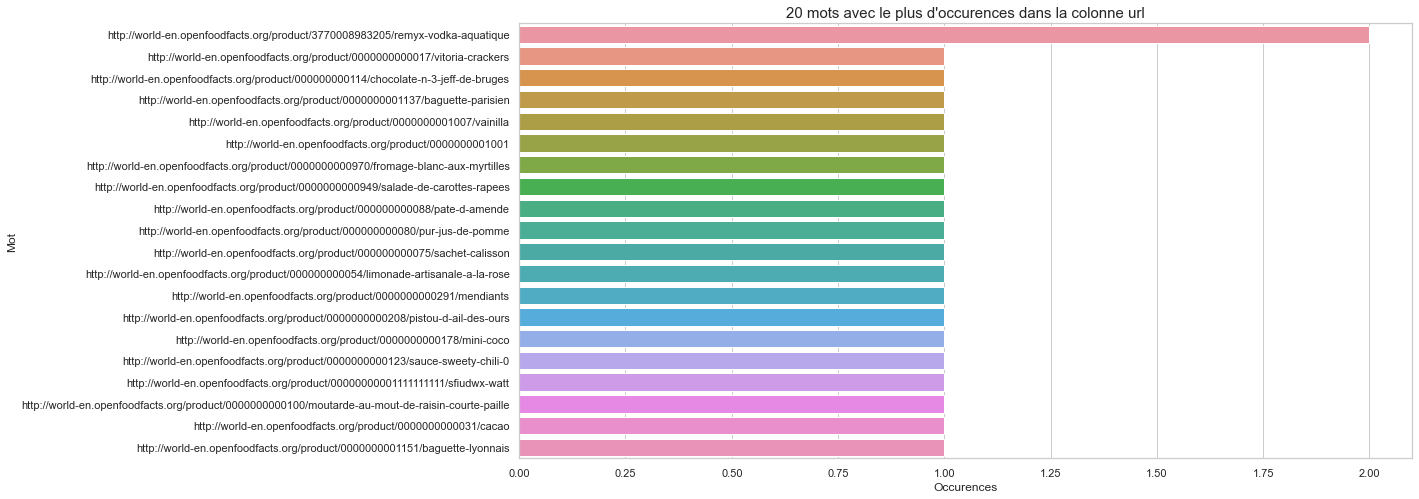

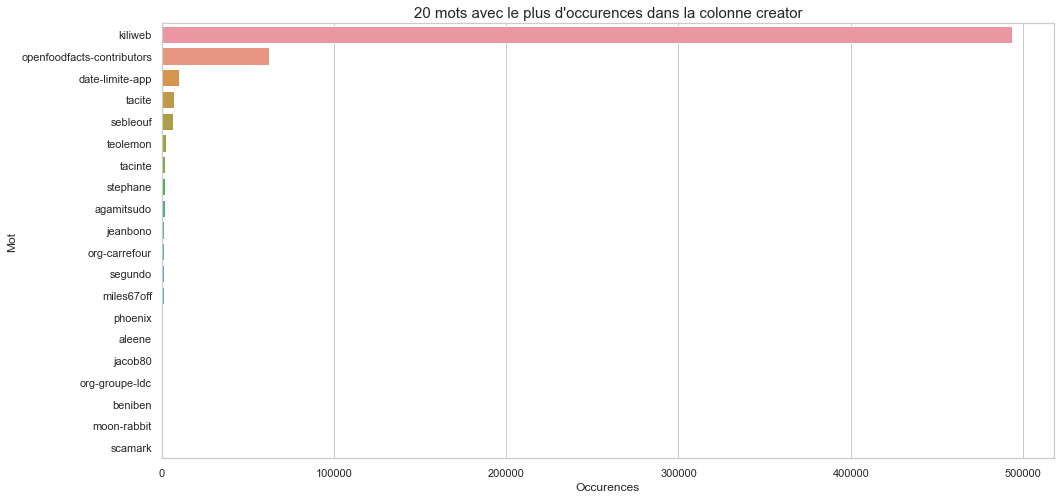

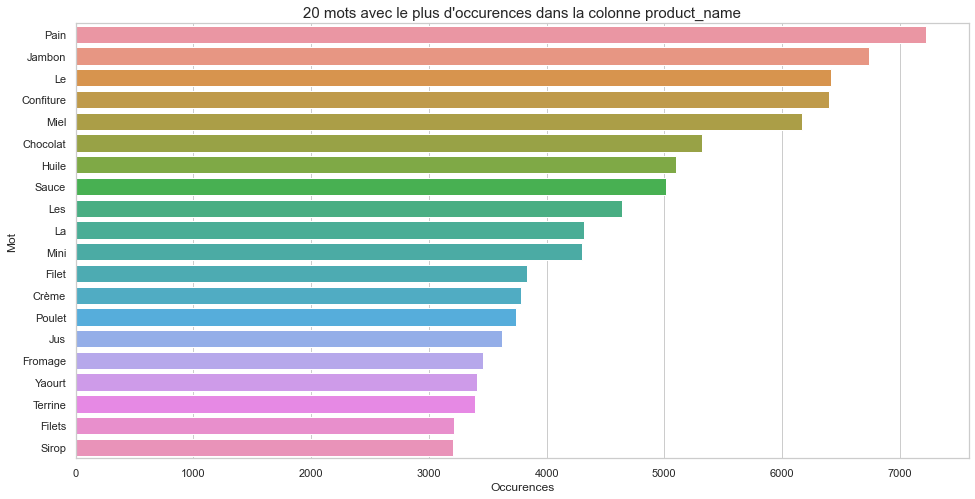

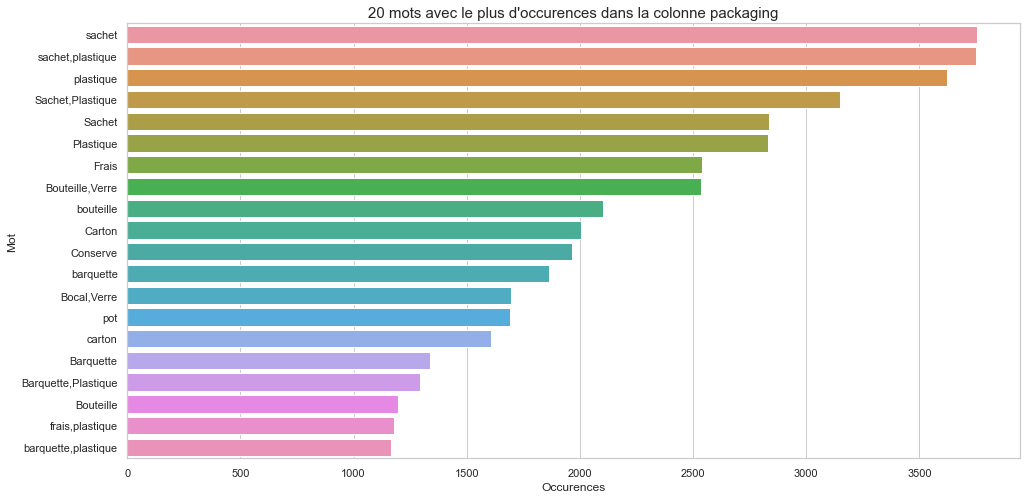

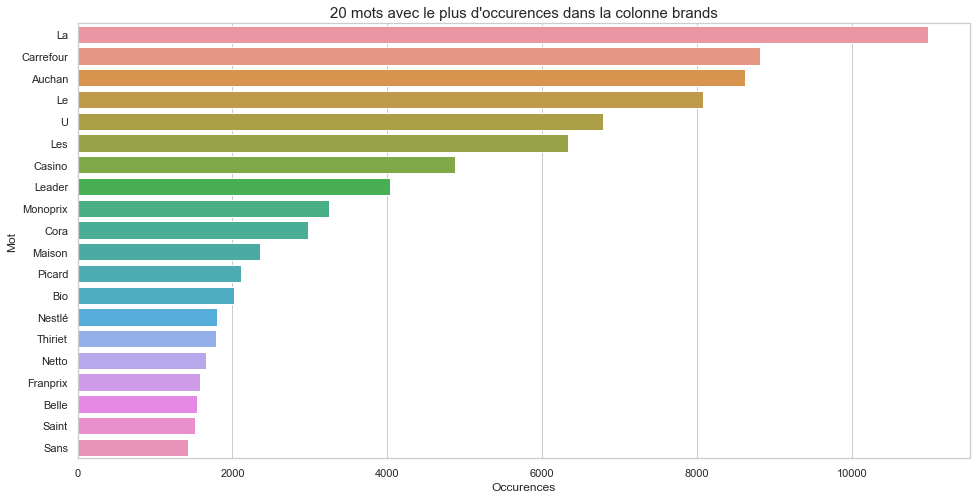

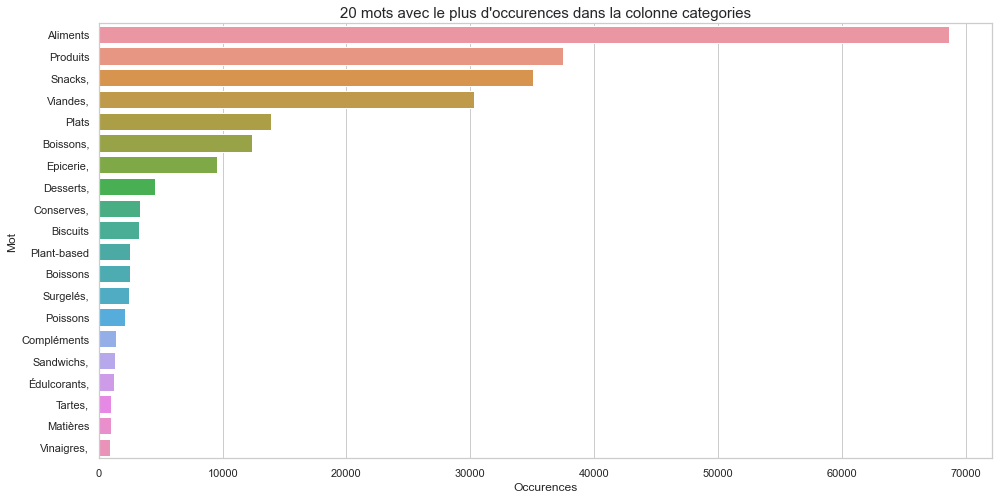

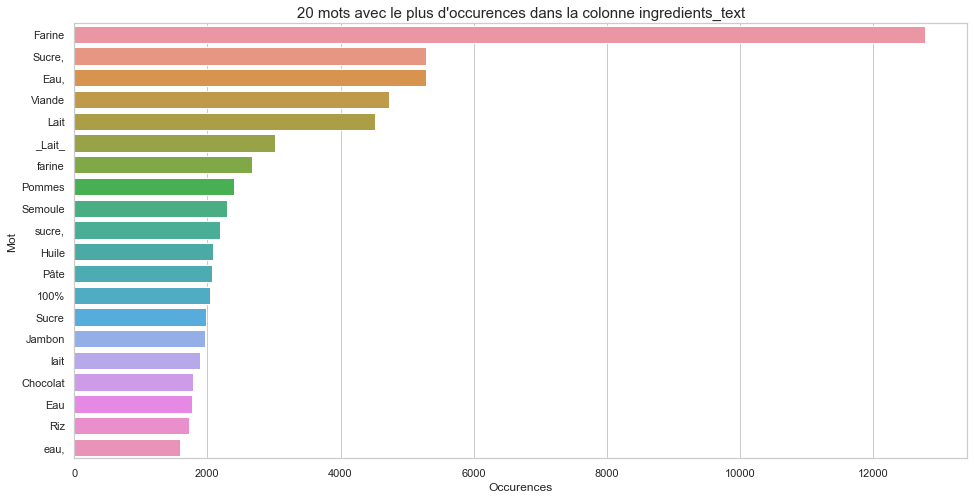

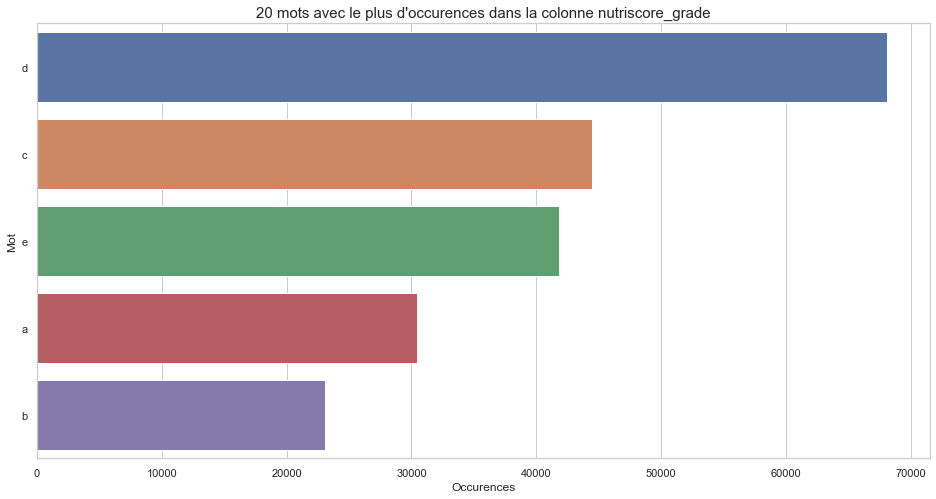

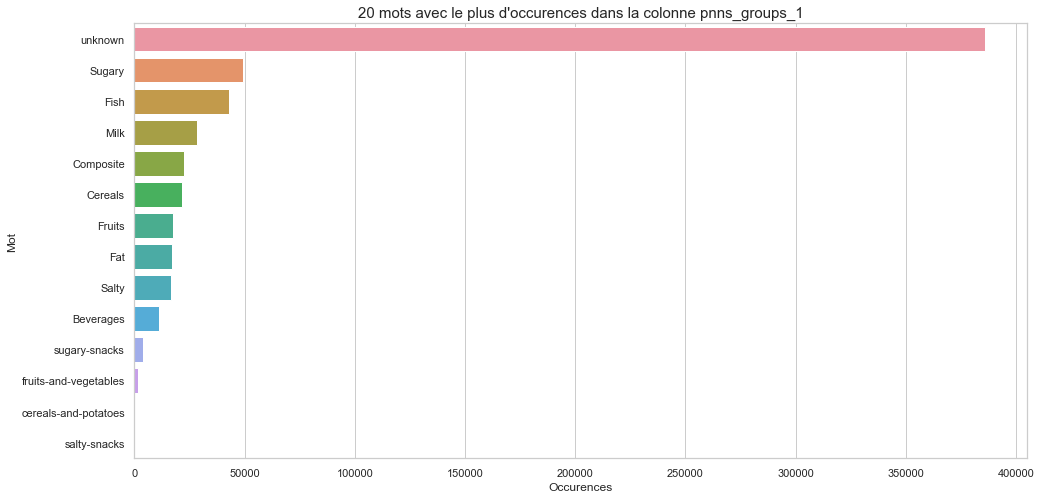

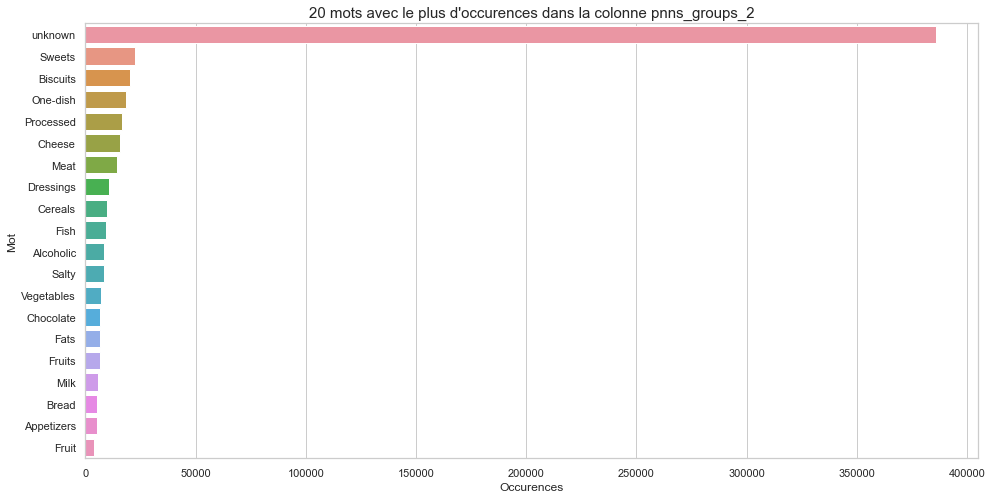

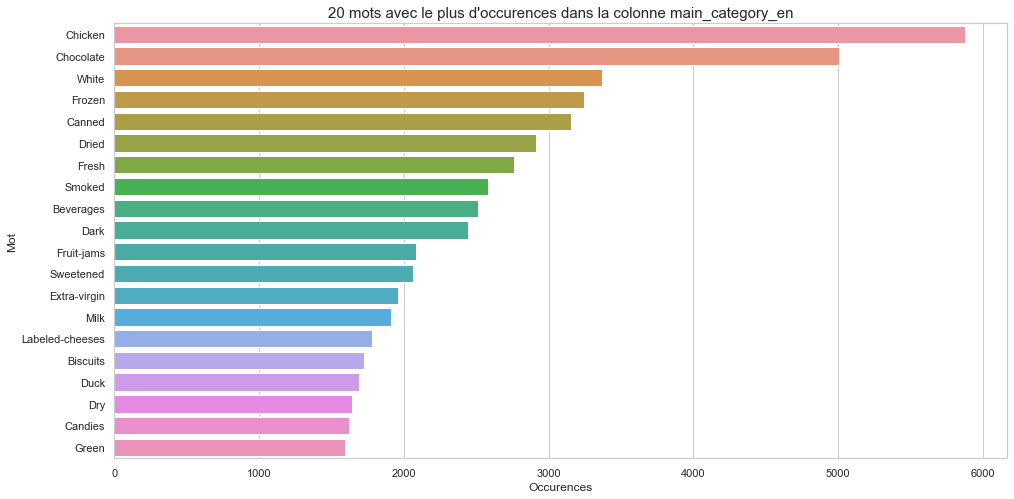

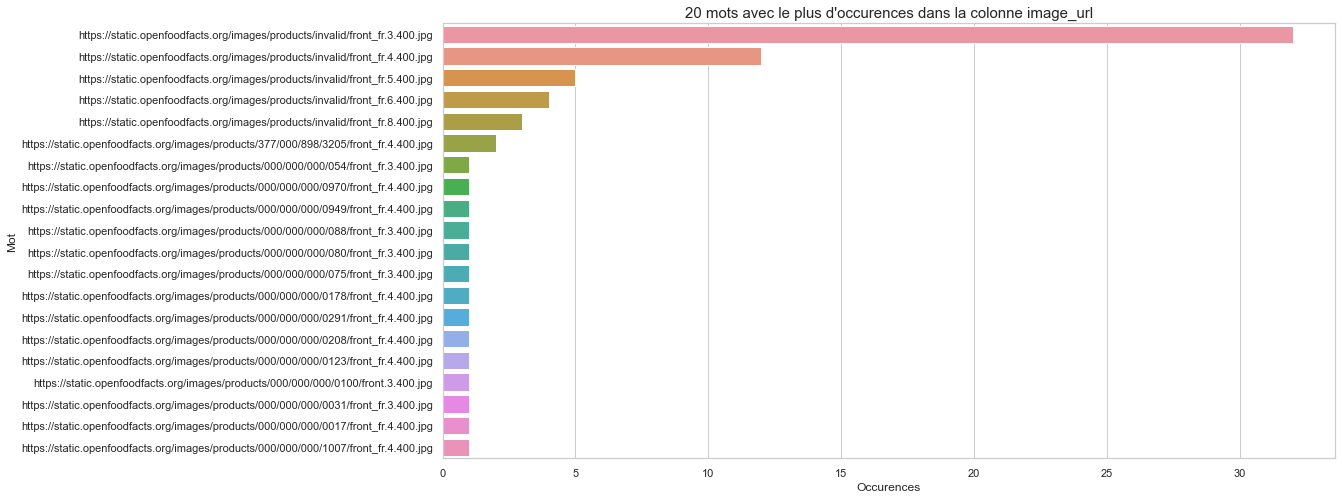

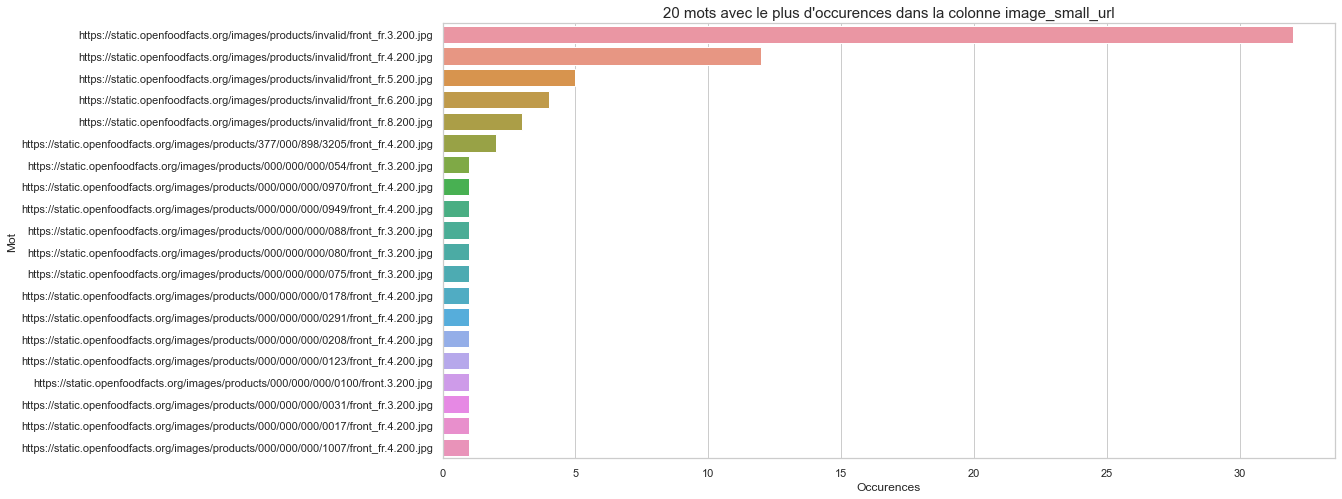

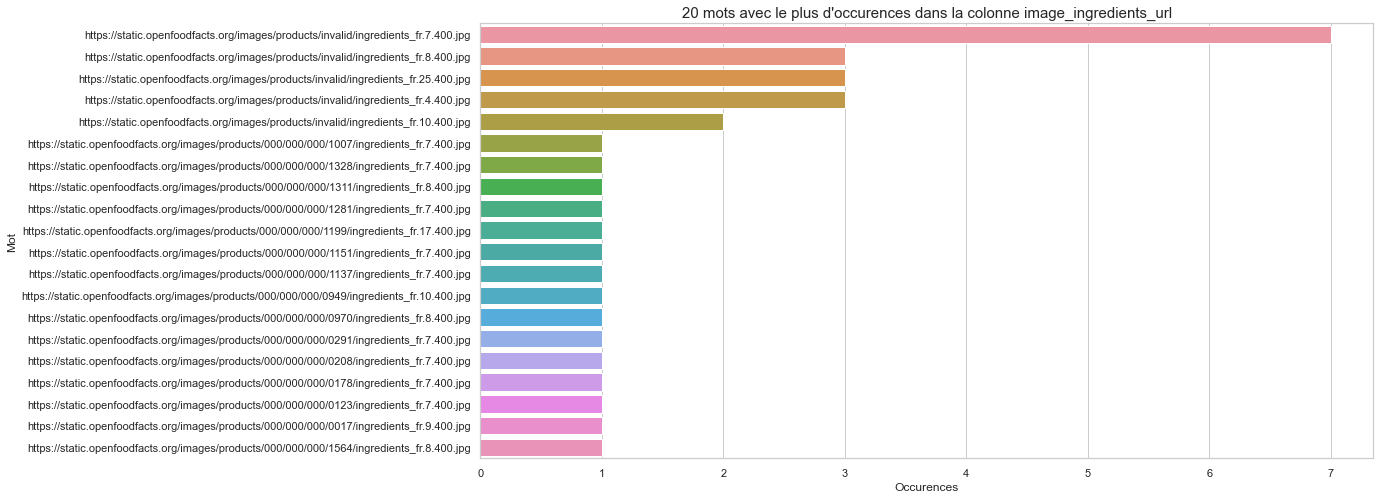

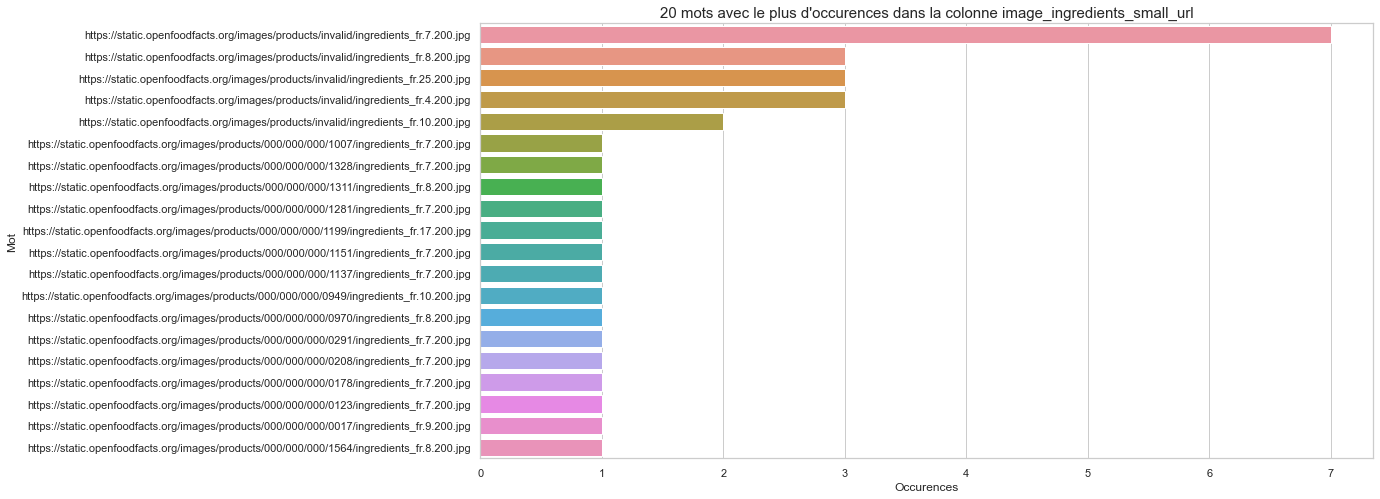

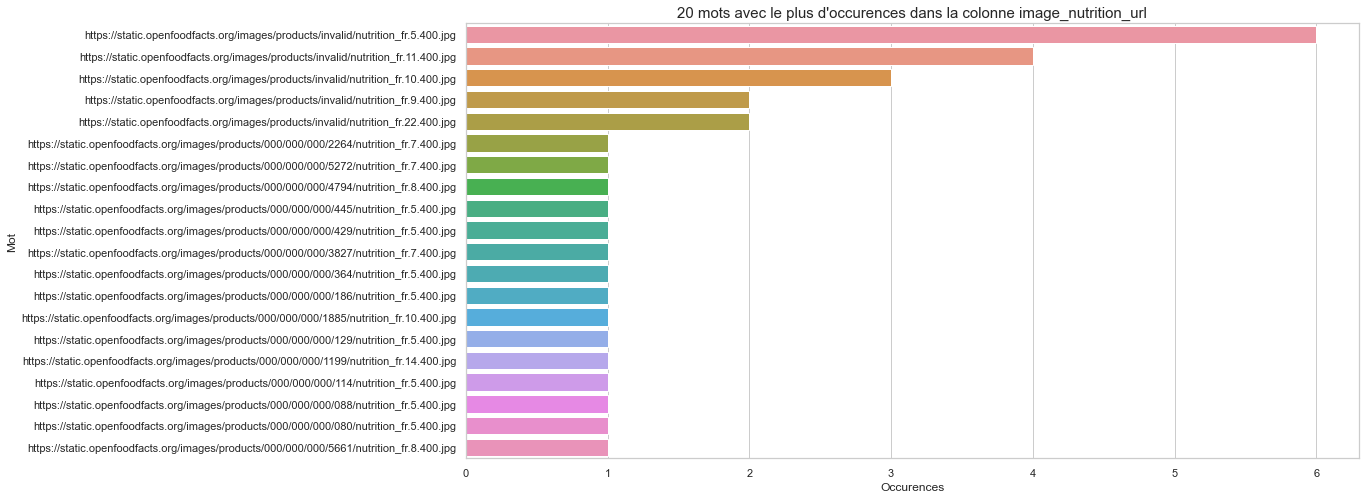

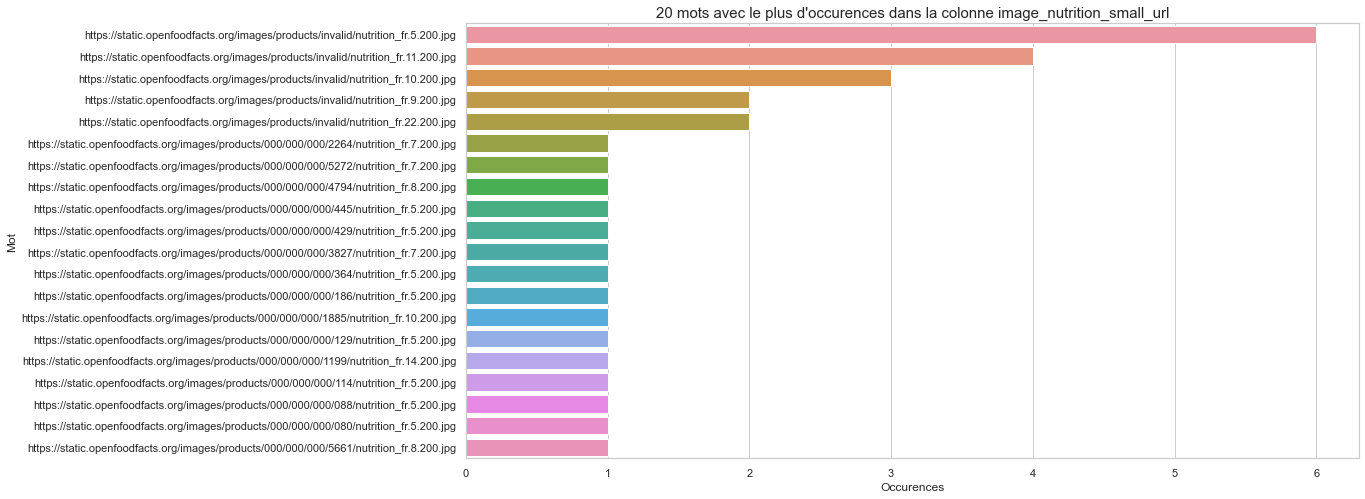

In [33]:
import collections
mots_populaires = []
for colonne in object_columns :
    liste_mots = [str(i).split(' ', 1)[0] for i in data[colonne].dropna().tolist()]
    mots_populaires.append(collections.Counter(liste_mots).most_common(20))

sns.set(font_scale=2.5)
for nom_colonne, liste_mots in zip(object_columns[1:], mots_populaires[1:]):
    sns.set(style="whitegrid")
    plt.figure(figsize=(16, 8))

    df_mots_utilises = pd.DataFrame(liste_mots, columns = ['Mot', 'Occurences']).sort_values(by='Occurences', ascending=False)
    df_mots_utilises.head()
    sns.barplot(y = 'Mot', x='Occurences', data = df_mots_utilises)
    plt.title('20 mots avec le plus d\'occurences dans la colonne ' + nom_colonne, size=15)
    plt.show()

sns.set(font_scale=1)

# Informations sur les données

In [34]:
data.head()

,code,url,creator,product_name,quantity,packaging,packaging_tags,brands,categories,origins_tags,manufacturing_places_tags,labels_tags,ingredients_text,traces_tags,additives_n,additives_tags,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,created,last_modified
0,0000000000017,http://world-en.openfoodfacts.org/product/0000000000017/vitoria-crackers,kiliweb,Vitória crackers,NaN,NaN,autre,NaN,NaN,autre,autre,autre,NaN,autre,NaN,autre,NaN,autre,NaN,1.0,autre,NaN,NaN,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/000/000/000/0017/front_fr.4.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0017/front_fr.4.200.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0017/ingredients_fr.9.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0017/ingredients_fr.9.200.jpg,NaN,NaN,NaN,1569.0,7.0,3.08,70.1,15.0,7.8,1.40,0.560,NaN,2018-06-15 10:38:00,2019-06-25 11:55:18
1,0000000000031,http://world-en.openfoodfacts.org/product/0000000000031/cacao,isagoofy,Cacao,130 g,NaN,autre,NaN,NaN,autre,autre,autre,NaN,autre,NaN,autre,NaN,autre,NaN,1.0,autre,NaN,NaN,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/000/000/000/0031/front_fr.3.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0031/front_fr.3.200.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-13 21:06:14,2018-10-13 21:06:57
2,0000000000100,http://world-en.openfoodfacts.org/product/0000000000100/moutarde-au-mout-de-raisin-courte-paille,del51,moutarde au moût de raisin,100g,NaN,autre,courte paille,"Epicerie, Condiments, Sauces, Moutardes",autre,autre,made in france,eau graines de téguments de moutarde vinaigre de vin rouge sel vin rouge sucre moût de raisin (6.2%) oignons colorants extraits de carotte et extrait de paprika huile de tournesol son de moutarde sel (cette _moutarde_ uniquement disponible chez courte paille),autre,0.0,autre,0.0,autre,0.0,1.0,autre,18.0,d,NaN,Fat and sauces,Dressings and sauces,Mustards,https://static.openfoodfacts.org/images/products/000/000/000/0100/front.3.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0100/front.3.200.jpg,NaN,NaN,NaN,NaN,NaN,936.0,8.2,2.20,29.0,22.0,5.1,4.60,1.840,18.0,2015-10-11 14:09:21,2015-10-12 14:13:32
3,00000000001111111111,http://world-en.openfoodfacts.org/product/00000000001111111111/sfiudwx-watt,openfoodfacts-contributors,Sfiudwx,dgesc,NaN,autre,Watt,Xsf,autre,autre,autre,NaN,autre,NaN,autre,NaN,autre,NaN,1.0,autre,NaN,NaN,NaN,unknown,unknown,fr:xsf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-08 18:56:13,2019-06-08 18:56:13
4,0000000000123,http://world-en.openfoodfacts.org/product/0000000000123/sauce-sweety-chili-0,kiliweb,Sauce Sweety chili 0%,NaN,NaN,autre,NaN,NaN,autre,autre,autre,NaN,autre,NaN,autre,NaN,autre,NaN,1.0,autre,NaN,NaN,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/000/000/000/0123/front_fr.4.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0123/front_fr.4.200.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0123/ingredients_fr.7.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0123/ingredients_fr.7.200.jpg,NaN,NaN,21.0,88.0,0.0,0.00,4.8,0.4,0.2,2.04,0.816,NaN,2018-08-31 17:53:02,2018-08-31 17:53:06


# Nutriscore

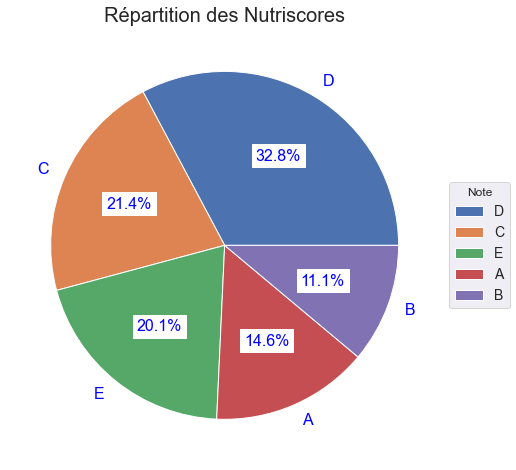

In [35]:
plt.figure(figsize=(8,8))

plt.title('Répartition des Nutriscores', size=20)
wedges, texts, autotexts = plt.pie(data.nutriscore_grade.value_counts().values, 
        labels = data.nutriscore_grade.value_counts().index.str.upper(),
       autopct='%1.1f%%', textprops={'fontsize': 16, 
                                     'color' : 'blue', 
                                     'backgroundcolor' : 'white',}
       )

ax = plt.gca()

ax.legend(wedges, data.nutriscore_grade.value_counts().index.str.upper(),
          title="Note",
          loc="center left",
          fontsize=14,
          bbox_to_anchor=(1, 0, 0.5, 1))

In [36]:
data.head()

,code,url,creator,product_name,quantity,packaging,packaging_tags,brands,categories,origins_tags,manufacturing_places_tags,labels_tags,ingredients_text,traces_tags,additives_n,additives_tags,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,created,last_modified
0,0000000000017,http://world-en.openfoodfacts.org/product/0000000000017/vitoria-crackers,kiliweb,Vitória crackers,NaN,NaN,autre,NaN,NaN,autre,autre,autre,NaN,autre,NaN,autre,NaN,autre,NaN,1.0,autre,NaN,NaN,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/000/000/000/0017/front_fr.4.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0017/front_fr.4.200.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0017/ingredients_fr.9.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0017/ingredients_fr.9.200.jpg,NaN,NaN,NaN,1569.0,7.0,3.08,70.1,15.0,7.8,1.40,0.560,NaN,2018-06-15 10:38:00,2019-06-25 11:55:18
1,0000000000031,http://world-en.openfoodfacts.org/product/0000000000031/cacao,isagoofy,Cacao,130 g,NaN,autre,NaN,NaN,autre,autre,autre,NaN,autre,NaN,autre,NaN,autre,NaN,1.0,autre,NaN,NaN,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/000/000/000/0031/front_fr.3.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0031/front_fr.3.200.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-13 21:06:14,2018-10-13 21:06:57
2,0000000000100,http://world-en.openfoodfacts.org/product/0000000000100/moutarde-au-mout-de-raisin-courte-paille,del51,moutarde au moût de raisin,100g,NaN,autre,courte paille,"Epicerie, Condiments, Sauces, Moutardes",autre,autre,made in france,eau graines de téguments de moutarde vinaigre de vin rouge sel vin rouge sucre moût de raisin (6.2%) oignons colorants extraits de carotte et extrait de paprika huile de tournesol son de moutarde sel (cette _moutarde_ uniquement disponible chez courte paille),autre,0.0,autre,0.0,autre,0.0,1.0,autre,18.0,d,NaN,Fat and sauces,Dressings and sauces,Mustards,https://static.openfoodfacts.org/images/products/000/000/000/0100/front.3.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0100/front.3.200.jpg,NaN,NaN,NaN,NaN,NaN,936.0,8.2,2.20,29.0,22.0,5.1,4.60,1.840,18.0,2015-10-11 14:09:21,2015-10-12 14:13:32
3,00000000001111111111,http://world-en.openfoodfacts.org/product/00000000001111111111/sfiudwx-watt,openfoodfacts-contributors,Sfiudwx,dgesc,NaN,autre,Watt,Xsf,autre,autre,autre,NaN,autre,NaN,autre,NaN,autre,NaN,1.0,autre,NaN,NaN,NaN,unknown,unknown,fr:xsf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-08 18:56:13,2019-06-08 18:56:13
4,0000000000123,http://world-en.openfoodfacts.org/product/0000000000123/sauce-sweety-chili-0,kiliweb,Sauce Sweety chili 0%,NaN,NaN,autre,NaN,NaN,autre,autre,autre,NaN,autre,NaN,autre,NaN,autre,NaN,1.0,autre,NaN,NaN,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/000/000/000/0123/front_fr.4.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0123/front_fr.4.200.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0123/ingredients_fr.7.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0123/ingredients_fr.7.200.jpg,NaN,NaN,21.0,88.0,0.0,0.00,4.8,0.4,0.2,2.04,0.816,NaN,2018-08-31 17:53:02,2018-08-31 17:53:06


In [37]:
#provenance des url

In [38]:
data.url.dropna().apply(lambda x: str(x).split('/')[2]).unique()

array(['world-en.openfoodfacts.org'], dtype=object)

In [39]:
data.image_url.dropna().apply(lambda x: str(x).split('/')[2]).unique()

array(['static.openfoodfacts.org'], dtype=object)

In [40]:
data.head()

,code,url,creator,product_name,quantity,packaging,packaging_tags,brands,categories,origins_tags,manufacturing_places_tags,labels_tags,ingredients_text,traces_tags,additives_n,additives_tags,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,created,last_modified
0,0000000000017,http://world-en.openfoodfacts.org/product/0000000000017/vitoria-crackers,kiliweb,Vitória crackers,NaN,NaN,autre,NaN,NaN,autre,autre,autre,NaN,autre,NaN,autre,NaN,autre,NaN,1.0,autre,NaN,NaN,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/000/000/000/0017/front_fr.4.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0017/front_fr.4.200.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0017/ingredients_fr.9.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0017/ingredients_fr.9.200.jpg,NaN,NaN,NaN,1569.0,7.0,3.08,70.1,15.0,7.8,1.40,0.560,NaN,2018-06-15 10:38:00,2019-06-25 11:55:18
1,0000000000031,http://world-en.openfoodfacts.org/product/0000000000031/cacao,isagoofy,Cacao,130 g,NaN,autre,NaN,NaN,autre,autre,autre,NaN,autre,NaN,autre,NaN,autre,NaN,1.0,autre,NaN,NaN,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/000/000/000/0031/front_fr.3.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0031/front_fr.3.200.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-13 21:06:14,2018-10-13 21:06:57
2,0000000000100,http://world-en.openfoodfacts.org/product/0000000000100/moutarde-au-mout-de-raisin-courte-paille,del51,moutarde au moût de raisin,100g,NaN,autre,courte paille,"Epicerie, Condiments, Sauces, Moutardes",autre,autre,made in france,eau graines de téguments de moutarde vinaigre de vin rouge sel vin rouge sucre moût de raisin (6.2%) oignons colorants extraits de carotte et extrait de paprika huile de tournesol son de moutarde sel (cette _moutarde_ uniquement disponible chez courte paille),autre,0.0,autre,0.0,autre,0.0,1.0,autre,18.0,d,NaN,Fat and sauces,Dressings and sauces,Mustards,https://static.openfoodfacts.org/images/products/000/000/000/0100/front.3.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0100/front.3.200.jpg,NaN,NaN,NaN,NaN,NaN,936.0,8.2,2.20,29.0,22.0,5.1,4.60,1.840,18.0,2015-10-11 14:09:21,2015-10-12 14:13:32
3,00000000001111111111,http://world-en.openfoodfacts.org/product/00000000001111111111/sfiudwx-watt,openfoodfacts-contributors,Sfiudwx,dgesc,NaN,autre,Watt,Xsf,autre,autre,autre,NaN,autre,NaN,autre,NaN,autre,NaN,1.0,autre,NaN,NaN,NaN,unknown,unknown,fr:xsf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-08 18:56:13,2019-06-08 18:56:13
4,0000000000123,http://world-en.openfoodfacts.org/product/0000000000123/sauce-sweety-chili-0,kiliweb,Sauce Sweety chili 0%,NaN,NaN,autre,NaN,NaN,autre,autre,autre,NaN,autre,NaN,autre,NaN,autre,NaN,1.0,autre,NaN,NaN,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/000/000/000/0123/front_fr.4.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0123/front_fr.4.200.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0123/ingredients_fr.7.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0123/ingredients_fr.7.200.jpg,NaN,NaN,21.0,88.0,0.0,0.00,4.8,0.4,0.2,2.04,0.816,NaN,2018-08-31 17:53:02,2018-08-31 17:53:06


# Additifs

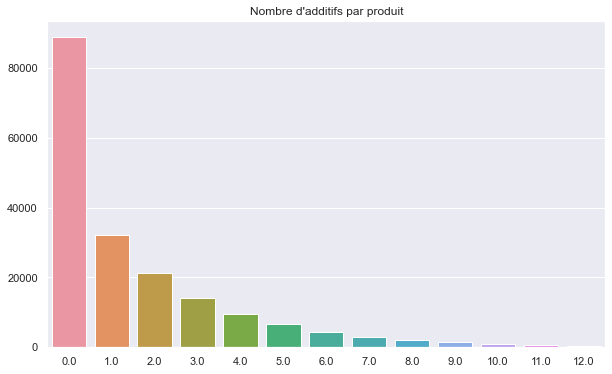

In [41]:
plt.figure(figsize=(10,6))
plt.title('Nombre d\'additifs par produit')
sns.barplot(x = data.additives_n.value_counts().index,
           y = data.additives_n.value_counts().values )
plt.show()

In [42]:
#origine

In [43]:
data.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['code', 'url', 'creator', 'product_name', 'quantity', 'packaging',
       'packaging_tags', 'brands', 'categories', 'origins_tags',
       'manufacturing_places_tags', 'labels_tags', 'ingredients_text',
       'traces_tags', 'additives_n', 'additives_tags',
       'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil',
       'ingredients_that_may_be_from_palm_oil_tags', 'nutriscore_score',
       'nutriscore_grade', 'nova_group', 'pnns_groups_1', 'pnns_groups_2',
       'main_category_en', 'image_url', 'image_small_url',
       'image_ingredients_url', 'image_ingredients_small_url',
       'image_nutrition_url', 'image_nutrition_small_url', 'energy-kcal_100g',
       'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'proteins_100g', 'salt_100g', 'sodium_100g',
       'nutrition-score-fr_100g',

In [44]:
#description des grandeurs

In [45]:
data[['energy_100g',
      'fat_100g',
      'saturated-fat_100g',
      'carbohydrates_100g',
      'sugars_100g',
      'proteins_100g',
      'salt_100g',
      'sodium_100g',
      'nutrition-score-fr_100g']
    ].describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,492049.000000,489872.000000,490373.000000,487374.000000,489260.000000,489118.000000,476114.000000,476113.000000,176831.000000
mean,1167.999432,14.558431,5.284735,26.798372,13.411413,8.862166,1.015868,0.406370,12.010982
std,775.198895,17.467783,6.811957,27.367667,19.450064,8.741664,1.648023,0.659309,7.475651
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,517.000000,1.200000,0.240000,2.200000,0.600000,1.800000,0.070000,0.028000,5.000000
50%,1125.000000,8.700000,2.200000,14.000000,3.100000,6.500000,0.570000,0.228000,13.000000
75%,1674.000000,23.000000,8.100000,51.900000,20.000000,13.000000,1.300000,0.520000,18.000000
max,3766.000000,100.000000,42.000000,97.000000,89.700000,66.700000,19.470000,7.788000,28.000000


# QUESTION 3 : Analyse Bivariée : Confirmer ou infirmer les hypothèses  à l’aide d’une analyse multivariée. Effectuer les tests statistiques appropriés pour vérifier la significativité des résultats.

# Analyse Bivariée

# Matrice de corrélation

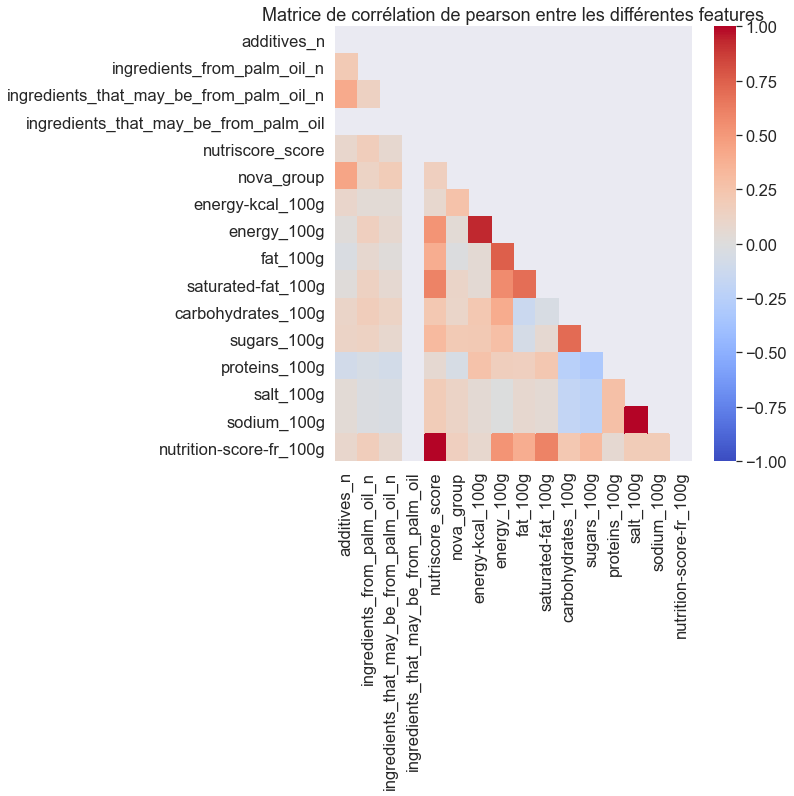

In [46]:
plt.figure(figsize=(8,8))
sns.set(font_scale=1.5)
plt.title('Matrice de corrélation de pearson entre les différentes features')

corr = data[numeric_columns].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True 

ax = sns.heatmap(corr, mask=mask, vmin=-1, cmap='coolwarm')
plt.show()
sns.set(font_scale=1)


In [47]:
object_columns = data.select_dtypes(include = ['object']).columns

In [48]:
object_columns

Index(['code', 'url', 'creator', 'product_name', 'quantity', 'packaging',
       'brands', 'categories', 'ingredients_text', 'nutriscore_grade',
       'pnns_groups_1', 'pnns_groups_2', 'main_category_en', 'image_url',
       'image_small_url', 'image_ingredients_url',
       'image_ingredients_small_url', 'image_nutrition_url',
       'image_nutrition_small_url'],
      dtype='object')

# Test du Chi 2 - Indépendance des variables

In [49]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2
def test_chi2(serie1, serie2):
    
    alpha = 0.03    
    
    #H0 : les variables sont indépendantes
    
    #print('tableau de contingence :\n', pd.crosstab(serie1.array, serie2.array))
    tab_contingence = pd.crosstab(serie1.array, serie2.array)
    stat_chi2, p, dof, expected_table = chi2_contingency(tab_contingence.values)
    print('chi2 : {0:.5f},\np : {0:.5f},\ndof : {0:.5f}\n'.format(stat_chi2, p, dof))
    #print('tableau de contingence : \n', tab_contingence)
    
    critical = chi2.ppf(1-alpha, dof) #
    #print('critital : ', critical)

    if p <= alpha:
        print('Variables non indépendantes (H0 rejetée) car p = {} <= alpha = {}'.format(p, alpha))
        return False
    
    else:
        print('H0 non rejetée car p = {} >= alpha = {}'.format(p, alpha))
        return True

In [50]:
data.head()

,code,url,creator,product_name,quantity,packaging,packaging_tags,brands,categories,origins_tags,manufacturing_places_tags,labels_tags,ingredients_text,traces_tags,additives_n,additives_tags,ingredients_from_palm_oil_n,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g,created,last_modified
0,0000000000017,http://world-en.openfoodfacts.org/product/0000000000017/vitoria-crackers,kiliweb,Vitória crackers,NaN,NaN,autre,NaN,NaN,autre,autre,autre,NaN,autre,NaN,autre,NaN,autre,NaN,1.0,autre,NaN,NaN,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/000/000/000/0017/front_fr.4.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0017/front_fr.4.200.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0017/ingredients_fr.9.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0017/ingredients_fr.9.200.jpg,NaN,NaN,NaN,1569.0,7.0,3.08,70.1,15.0,7.8,1.40,0.560,NaN,2018-06-15 10:38:00,2019-06-25 11:55:18
1,0000000000031,http://world-en.openfoodfacts.org/product/0000000000031/cacao,isagoofy,Cacao,130 g,NaN,autre,NaN,NaN,autre,autre,autre,NaN,autre,NaN,autre,NaN,autre,NaN,1.0,autre,NaN,NaN,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/000/000/000/0031/front_fr.3.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0031/front_fr.3.200.jpg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-10-13 21:06:14,2018-10-13 21:06:57
2,0000000000100,http://world-en.openfoodfacts.org/product/0000000000100/moutarde-au-mout-de-raisin-courte-paille,del51,moutarde au moût de raisin,100g,NaN,autre,courte paille,"Epicerie, Condiments, Sauces, Moutardes",autre,autre,made in france,eau graines de téguments de moutarde vinaigre de vin rouge sel vin rouge sucre moût de raisin (6.2%) oignons colorants extraits de carotte et extrait de paprika huile de tournesol son de moutarde sel (cette _moutarde_ uniquement disponible chez courte paille),autre,0.0,autre,0.0,autre,0.0,1.0,autre,18.0,d,NaN,Fat and sauces,Dressings and sauces,Mustards,https://static.openfoodfacts.org/images/products/000/000/000/0100/front.3.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0100/front.3.200.jpg,NaN,NaN,NaN,NaN,NaN,936.0,8.2,2.20,29.0,22.0,5.1,4.60,1.840,18.0,2015-10-11 14:09:21,2015-10-12 14:13:32
3,00000000001111111111,http://world-en.openfoodfacts.org/product/00000000001111111111/sfiudwx-watt,openfoodfacts-contributors,Sfiudwx,dgesc,NaN,autre,Watt,Xsf,autre,autre,autre,NaN,autre,NaN,autre,NaN,autre,NaN,1.0,autre,NaN,NaN,NaN,unknown,unknown,fr:xsf,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2019-06-08 18:56:13,2019-06-08 18:56:13
4,0000000000123,http://world-en.openfoodfacts.org/product/0000000000123/sauce-sweety-chili-0,kiliweb,Sauce Sweety chili 0%,NaN,NaN,autre,NaN,NaN,autre,autre,autre,NaN,autre,NaN,autre,NaN,autre,NaN,1.0,autre,NaN,NaN,NaN,unknown,unknown,NaN,https://static.openfoodfacts.org/images/products/000/000/000/0123/front_fr.4.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0123/front_fr.4.200.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0123/ingredients_fr.7.400.jpg,https://static.openfoodfacts.org/images/products/000/000/000/0123/ingredients_fr.7.200.jpg,NaN,NaN,21.0,88.0,0.0,0.00,4.8,0.4,0.2,2.04,0.816,NaN,2018-08-31 17:53:02,2018-08-31 17:53:06


In [51]:
#data.nunique().sort_values()

In [52]:
pd.crosstab(data['ingredients_from_palm_oil_tags'], data['packaging_tags'])

packaging_tags,autre,carton,conserve,plastique,verre
ingredients_from_palm_oil_tags,,,,,
E304,113,15,1,97,0
autre,521424,10624,5459,64271,16955
huile-de-palme,4426,730,19,3603,78


In [53]:
tags = data.columns[data.columns.str.contains('_tag')].tolist()

In [54]:
tags

['packaging_tags',
 'origins_tags',
 'manufacturing_places_tags',
 'labels_tags',
 'traces_tags',
 'additives_tags',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_tags']

In [55]:
data[tags].sample(5)

,packaging_tags,origins_tags,manufacturing_places_tags,labels_tags,traces_tags,additives_tags,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_tags
589003,autre,autre,autre,autre,autre,autre,autre,autre
537667,autre,autre,autre,bio,autre,autre,autre,autre
609995,autre,autre,autre,autre,autre,autre,autre,autre
296575,autre,autre,autre,autre,autre,autre,autre,autre
307346,autre,autre,autre,autre,autre,E330,autre,autre


In [56]:
data.select_dtypes(include = ['int32','float64']).columns

Index(['additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil', 'nutriscore_score',
       'nova_group', 'energy-kcal_100g', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g'],
      dtype='object')

In [57]:
import seaborn as sns
x = pd.cut(data['nutrition-score-fr_100g'], 20)
for column in data.select_dtypes(include = ['int32','float64']).columns:
    print('test d\'indépendance {} / {}'.format('nutriscore',column))
    if data[column].nunique() > 20 :
        y = pd.cut(data[column], 20).astype('category')
    else:
        y = data[column].astype('category')
    test_chi2(x, y)
    
    #table = pd.DataFrame({'nutriscore' : x, column : y})
    #print(table.sample(10))
    print('________________________________________________________________________________________________\n')

test d'indépendance nutriscore / additives_n
chi2 : 5307.23676,
p : 5307.23676,
dof : 5307.23676

Variables non indépendantes (H0 rejetée) car p = 0.0 <= alpha = 0.03
________________________________________________________________________________________________

test d'indépendance nutriscore / ingredients_from_palm_oil_n
chi2 : 3528.60304,
p : 3528.60304,
dof : 3528.60304

Variables non indépendantes (H0 rejetée) car p = 0.0 <= alpha = 0.03
________________________________________________________________________________________________

test d'indépendance nutriscore / ingredients_that_may_be_from_palm_oil_n
chi2 : 985.77317,
p : 985.77317,
dof : 985.77317

Variables non indépendantes (H0 rejetée) car p = 4.181225818876153e-182 <= alpha = 0.03
________________________________________________________________________________________________

test d'indépendance nutriscore / ingredients_that_may_be_from_palm_oil
chi2 : 0.00000,
p : 0.00000,
dof : 0.00000

H0 non rejetée car p = 1.0 >= 

# Test ANOVA (Analyse de la variance) - Indépendance des variables

# Test de Normalité

# A : test de normalité d'Agostino & Pearson

In [58]:
?stats.normaltest

In [59]:
data[numeric_columns].head()

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutriscore_score,nova_group,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1569.0,7.0,3.08,70.1,15.0,7.8,1.40,0.560,NaN
1,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0.0,0.0,1.0,18.0,NaN,NaN,936.0,8.2,2.20,29.0,22.0,5.1,4.60,1.840,18.0
3,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,1.0,NaN,NaN,21.0,88.0,0.0,0.00,4.8,0.4,0.2,2.04,0.816,NaN


In [60]:
from scipy import stats
numeric_columns = data.select_dtypes(include = ['int32','float64']).columns
numeric_columns = numeric_columns[1:]
for column in numeric_columns:
    print('________\n{}'.format(column))
    k2, p = stats.normaltest(data[column], 
                             axis=0,
                             nan_policy = 'omit')
    alpha = 5e-2
    print("p = {:g}".format(p))
    if p < alpha:  # null hypothese: x a une distribution normale
        print("H0 est rejetée : {} n'est pas de distribution normale".format(column))
    else:
        print("H0 ne peut être rejetée :{}, on considère l'hypothèse de normalité".format(column))

________
ingredients_from_palm_oil_n
p = 0
H0 est rejetée : ingredients_from_palm_oil_n n'est pas de distribution normale
________
ingredients_that_may_be_from_palm_oil_n
p = 0
H0 est rejetée : ingredients_that_may_be_from_palm_oil_n n'est pas de distribution normale
________
ingredients_that_may_be_from_palm_oil
p = 0
H0 est rejetée : ingredients_that_may_be_from_palm_oil n'est pas de distribution normale
________
nutriscore_score
p = 0
H0 est rejetée : nutriscore_score n'est pas de distribution normale
________
nova_group
p = 0
H0 est rejetée : nova_group n'est pas de distribution normale
________
energy-kcal_100g
p = 0
H0 est rejetée : energy-kcal_100g n'est pas de distribution normale
________
energy_100g
p = 0
H0 est rejetée : energy_100g n'est pas de distribution normale
________
fat_100g
p = 0
H0 est rejetée : fat_100g n'est pas de distribution normale
________
saturated-fat_100g
p = 0
H0 est rejetée : saturated-fat_100g n'est pas de distribution normale
________
carbohydrates_1

# B. Test de normalité Kolmogorov Smirnov

In [61]:
from scipy import stats
numeric_columns = data.select_dtypes(include = ['int32','float64']).columns
numeric_columns = numeric_columns[1:]

for column in numeric_columns:
    print('________\n{}'.format(column))
    D, p = stats.kstest(data[column].dropna(), 
                     'norm', 
                     args=(data[column].mean(), data[column].std()))
    alpha = 5e-2
    print("p = {}".format(p))
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("The null hypothesis can be rejected : {} is not from a normal distribution".format(column))
    else:
        print("The null hypothesis cannot be rejected")

________
ingredients_from_palm_oil_n
p = 0.0
The null hypothesis can be rejected : ingredients_from_palm_oil_n is not from a normal distribution
________
ingredients_that_may_be_from_palm_oil_n
p = 0.0
The null hypothesis can be rejected : ingredients_that_may_be_from_palm_oil_n is not from a normal distribution
________
ingredients_that_may_be_from_palm_oil
p = nan
The null hypothesis cannot be rejected
________
nutriscore_score
p = 0.0
The null hypothesis can be rejected : nutriscore_score is not from a normal distribution
________
nova_group
p = 0.0
The null hypothesis can be rejected : nova_group is not from a normal distribution
________
energy-kcal_100g
p = 0.0
The null hypothesis can be rejected : energy-kcal_100g is not from a normal distribution
________
energy_100g


C:\Users\matth\anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1844: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


p = 0.0
The null hypothesis can be rejected : energy_100g is not from a normal distribution
________
fat_100g
p = 0.0
The null hypothesis can be rejected : fat_100g is not from a normal distribution
________
saturated-fat_100g
p = 0.0
The null hypothesis can be rejected : saturated-fat_100g is not from a normal distribution
________
carbohydrates_100g
p = 0.0
The null hypothesis can be rejected : carbohydrates_100g is not from a normal distribution
________
sugars_100g
p = 0.0
The null hypothesis can be rejected : sugars_100g is not from a normal distribution
________
proteins_100g
p = 0.0
The null hypothesis can be rejected : proteins_100g is not from a normal distribution
________
salt_100g
p = 0.0
The null hypothesis can be rejected : salt_100g is not from a normal distribution
________
sodium_100g
p = 0.0
The null hypothesis can be rejected : sodium_100g is not from a normal distribution
________
nutrition-score-fr_100g
p = 0.0
The null hypothesis can be rejected : nutrition-score-

# C. ANOVA : analyse de la variance

In [62]:
data['nutriscore_grade'].dropna().unique().tolist()

['d', 'b', 'a', 'c', 'e']

In [63]:
from scipy import stats

data_a = data[data['nutriscore_grade'] == 'a'].select_dtypes(['int32','float64']).dropna(axis=0).dropna(axis=1)
data_b = data[data['nutriscore_grade'] == 'b'].select_dtypes(['int32','float64']).dropna(axis=0).dropna(axis=1)
data_c = data[data['nutriscore_grade'] == 'c'].select_dtypes(['int32','float64']).dropna(axis=0).dropna(axis=1)
data_d = data[data['nutriscore_grade'] == 'd'].select_dtypes(['int32','float64']).dropna(axis=0).dropna(axis=1)
data_e = data[data['nutriscore_grade'] == 'e'].select_dtypes(['int32','float64']).dropna(axis=0).dropna(axis=1)

f_statistic, p = stats.f_oneway(
                                    data_b,
                                    data_c,
                                    data_d,
                                    data_e)

C:\Users\matth\anaconda3\lib\site-packages\scipy\stats\stats.py:3641: F_onewayConstantInputWarning: Each of the input arrays is constant;the F statistic is not defined or infinite
  warnings.warn(F_onewayConstantInputWarning())


In [64]:
pd.DataFrame({'features': data_b.columns.tolist(),
              'p' : p,
              'bool_test' : p<alpha}) #si p<alpha : on rejette l'hypothèse d'indépendance H0 : les variables ne sont pas indépendantes

,features,p,bool_test
0,additives_n,1.221401e-01,False
1,ingredients_from_palm_oil_n,2.429369e-01,False
2,ingredients_that_may_be_from_palm_oil_n,3.393742e-01,False
3,ingredients_that_may_be_from_palm_oil,NaN,False
4,nutriscore_score,5.768444e-55,True
5,nova_group,9.712428e-01,False
6,energy-kcal_100g,6.041218e-02,False
7,energy_100g,6.839869e-01,False
8,fat_100g,2.048585e-02,True
9,saturated-fat_100g,3.872584e-06,True


# Test de student d'indépendance

In [65]:
from sklearn.preprocessing import StandardScaler

In [66]:
data['salt_100g'].dropna()

0         1.40
2         4.60
4         2.04
5         1.15
9         0.00
          ... 
627807    0.19
627809    0.00
627811    0.02
627812    1.10
627813    0.18
Name: salt_100g, Length: 476114, dtype: float64

In [67]:
scaler = StandardScaler(copy=True, with_mean=False, with_std=True)
a = data[['nutrition-score-fr_100g','salt_100g']].copy().dropna()
b = scaler.fit_transform(a['salt_100g'].values.reshape(-1,1))
a = a['nutrition-score-fr_100g']
a = scaler.fit_transform(a.values.reshape(-1,1))
alpha = 0.05

In [68]:
t_stats, p = stats.ttest_ind(a, b)

In [69]:
p < alpha

array([ True])

# QUESTION 4 : Élaborer une idée d’application. Identifier des arguments justifiant la faisabilité (ou non) de l’application à partir des données Open Food Facts.

# Calcul automatique de nutri score par régression linéaire

# Préparation jeu de données

In [70]:
data_reg = data[data['nutrition-score-fr_100g'].isna() == False].select_dtypes(['int32','float64']).dropna()

In [71]:
data[data['nutrition-score-fr_100g'].isna() == False].select_dtypes(['int32','float64']).shape

(176831, 16)

In [72]:
data[data['nutrition-score-fr_100g'].isna() == False].select_dtypes(['int32','float64']).dropna(axis=0).shape

(146, 16)

In [73]:
data[data['nutrition-score-fr_100g'].isna() == False].select_dtypes(['int32','float64']).isna().sum().sort_values(ascending=False)

energy-kcal_100g                           163227
nova_group                                 87432 
ingredients_that_may_be_from_palm_oil_n    80335 
additives_n                                80266 
ingredients_from_palm_oil_n                79749 
saturated-fat_100g                         1862  
sugars_100g                                1217  
carbohydrates_100g                         1207  
energy_100g                                757   
proteins_100g                              623   
sodium_100g                                620   
salt_100g                                  620   
fat_100g                                   346   
nutrition-score-fr_100g                    0     
nutriscore_score                           0     
ingredients_that_may_be_from_palm_oil      0     
dtype: int64

In [74]:
data_reg.shape

(146, 16)

In [75]:
data_reg = data[data['nutrition-score-fr_100g'].isna() == False].select_dtypes(['int32','float64'])

In [76]:
data_reg = data_reg.drop(['ingredients_that_may_be_from_palm_oil','additives_n','energy-kcal_100g','nova_group','ingredients_that_may_be_from_palm_oil_n','ingredients_from_palm_oil_n','nutriscore_score'], axis=1).dropna(axis=0)

In [77]:
data_reg.shape

(172745, 9)

In [78]:
data_reg.isna().sum()

energy_100g                0
fat_100g                   0
saturated-fat_100g         0
carbohydrates_100g         0
sugars_100g                0
proteins_100g              0
salt_100g                  0
sodium_100g                0
nutrition-score-fr_100g    0
dtype: int64

In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = data_reg.copy()
y = X['nutrition-score-fr_100g']
X = X.drop(['nutrition-score-fr_100g'],axis=1)


scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)


# Régression linéaire multiple

In [80]:
#?LinearRegression

In [81]:
lr = LinearRegression().fit(X_train, y_train)
print('R² sur jeu d\'entraînement : ', lr.score(X_train,y_train))
print('R² sur jeu de test', lr.score(X_test,y_test))
print('Poids de chaque variable dans la régression', lr.coef_)
print('ordonnée à l\'origine', lr.intercept_)

R² sur jeu d'entraînement :  0.6317573340720002
R² sur jeu de test 0.629607177689011
Poids de chaque variable dans la régression [ 1.57640995 -0.52112548  4.2491063   0.17138177  2.84450827 -0.24242027
  0.79897534  1.95242644]
ordonnée à l'origine 11.92365037036632


In [82]:
resultat = pd.DataFrame({'nutriscore_reel' : y_test, 'prediction' : lr.predict(X_test)}).reset_index()

In [83]:
resultat.head()

,index,nutriscore_reel,prediction
0,473505,1.0,5.409932
1,574345,6.0,2.251177
2,118238,0.0,5.069692
3,342996,8.0,14.818489
4,20002,13.0,9.599004


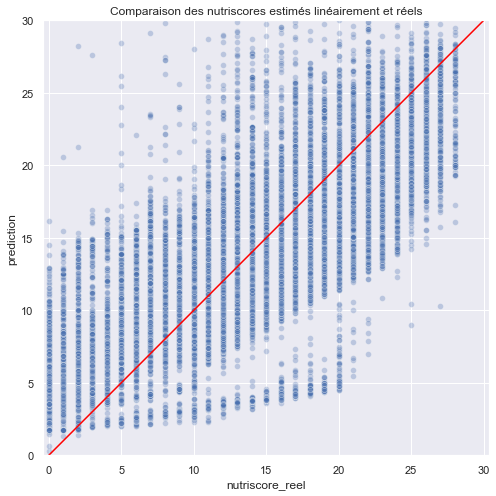

In [84]:
plt.figure(figsize=(8,8))
plt.axis('equal')
plt.title('Comparaison des nutriscores estimés linéairement et réels')
sns.scatterplot(x = resultat['nutriscore_reel'], y = resultat['prediction'], alpha=0.3)
sns.lineplot([0 , 30], [0, 30], color='red')
ax = plt.gca()
ax.set_xlim(0,30)
ax.set_ylim(0,30)
plt.show()

In [85]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print('root mean squared error : ', sqrt(mean_squared_error(y_true = resultat['nutriscore_reel'], y_pred = resultat['prediction'])))

root mean squared error :  4.531825924545857


In [86]:
compare = abs(resultat['nutriscore_reel'] - resultat['prediction'])

In [87]:
compare.sum()/len(compare)

3.693091782285883

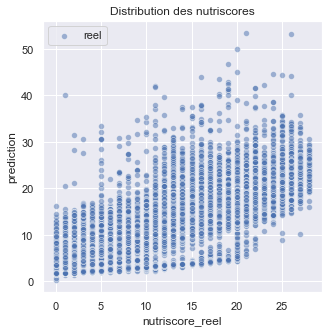

In [88]:
plt.figure(figsize=(5,5))
plt.title('Distribution des nutriscores')
sns.scatterplot( x = resultat['nutriscore_reel'], 
               y = resultat['prediction'], alpha=0.5)
plt.legend(['reel', 'prediction'])

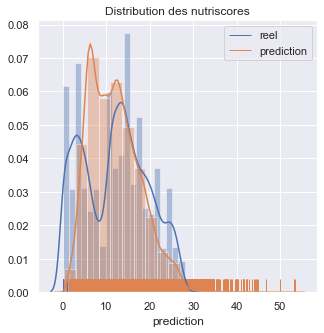

In [89]:
plt.figure(figsize=(5,5))
plt.title('Distribution des nutriscores')
sns.distplot(resultat['nutriscore_reel'], bins=20, rug=True)
sns.distplot(resultat['prediction'], bins = 20, rug=True)
plt.legend(['reel', 'prediction'])

In [90]:
pertinence_variables = pd.DataFrame()

In [91]:
pertinence_variables['coefs'] = lr.coef_.T

In [92]:
pertinence_variables

,coefs
0,1.576410
1,-0.521125
2,4.249106
3,0.171382
4,2.844508
5,-0.242420
6,0.798975
7,1.952426


In [93]:
pertinence_variables['colonnes']= data_reg.drop(['nutrition-score-fr_100g'], axis=1).columns.tolist()

In [94]:
pertinence_variables['coefs'] = abs(pertinence_variables['coefs'])

In [95]:
pertinence_variables.sort_values(by='coefs', inplace=True, ascending=False)

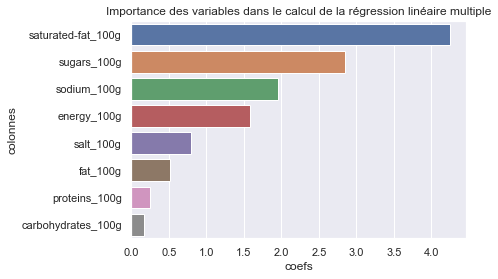

In [96]:
plt.title('Importance des variables dans le calcul de la régression linéaire multiple')
sns.barplot(x = pertinence_variables['coefs'], y =pertinence_variables['colonnes'])
plt.show()

# Ridge régression

In [97]:
from sklearn.linear_model import Ridge

In [98]:
alphas = np.logspace(-8,0,9)
scores = []
ridge = {}
for alpha in alphas:
    ridge[alpha] = Ridge(alpha = alpha)
    ridge[alpha].fit(X_train, y_train)
    #print(ridge.score(X_train, y_train))
    #print(ridge.score(X_test, y_test))
    scores.append(ridge[alpha].score(X_test, y_test))

In [99]:
rmse = []
for alpha in alphas:
    rmse.append(sqrt(mean_squared_error(y_test, ridge[alpha].predict(X_test))))

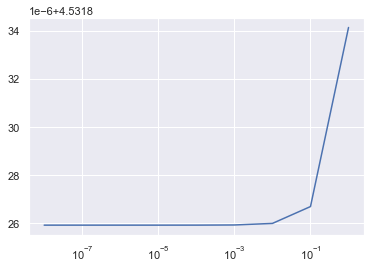

In [100]:
plt.figure()
ax = plt.gca()
ax.set(xscale="log")
plt.plot(alphas,rmse)
plt.show()

In [101]:
alphas[rmse.index(min(rmse))]

1e-08

In [102]:
print('Minimum de RMSE pour alpha = {} (RMSE = {})'.format(alphas[rmse.index(min(rmse))], min(rmse)))

Minimum de RMSE pour alpha = 1e-08 (RMSE = 4.5318259245459345)


In [103]:
ridge_optimal = Ridge(alpha = 1e-8)
ridge_optimal.fit(X_train, y_train)

Ridge(alpha=1e-08)

In [104]:
print('R² sur jeu d\'entraînement : ', ridge_optimal.score(X_train,y_train))
print('R² sur jeu de test', ridge_optimal.score(X_test,y_test))
print('Poids de chaque variable dans la régression', ridge_optimal.coef_)
print('ordonnée à l\'origine', ridge_optimal.intercept_)

R² sur jeu d'entraînement :  0.6317573340720002
R² sur jeu de test 0.6296071776889984
Poids de chaque variable dans la régression [ 1.57640995 -0.52112548  4.2491063   0.17138177  2.84450827 -0.24242027
  0.79897535  1.95242644]
ordonnée à l'origine 11.923650370366124


In [105]:
pertinence_variables_ridge = pd.DataFrame()
pertinence_variables_ridge['colonnes']= data_reg.drop(['nutrition-score-fr_100g'], axis=1).columns.tolist()
pertinence_variables_ridge['variance max'] = abs(ridge[alphas[rmse.index(min(rmse))]].coef_.T)
pertinence_variables_ridge.sort_values(by='variance max', ascending=False, inplace=True)

In [106]:
pertinence_variables_ridge

,colonnes,variance max
2,saturated-fat_100g,4.249106
4,sugars_100g,2.844508
7,sodium_100g,1.952426
0,energy_100g,1.576410
6,salt_100g,0.798975
1,fat_100g,0.521125
5,proteins_100g,0.242420
3,carbohydrates_100g,0.171382


<AxesSubplot:title={'center':'Importance des variables dans le calcul de la régression ridge'}, xlabel='variance max', ylabel='colonnes'>

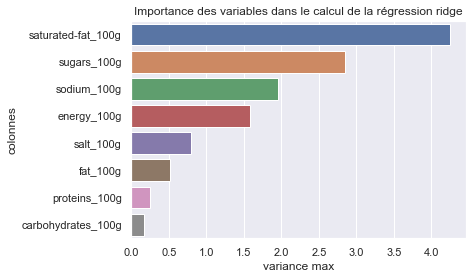

In [107]:
plt.title('Importance des variables dans le calcul de la régression ridge')
sns.barplot(y = pertinence_variables_ridge['colonnes'], x=pertinence_variables_ridge['variance max'])

# Lasso

In [108]:
from sklearn.linear_model import Lasso

C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1326334.6136932613, tolerance: 720.7123448432359
  model = cd_fast.enet_coordinate_descent(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1320427.143770282, tolerance: 720.7123448432359
  model = cd_fast.enet_coordinate_descent(
C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1260631.4715684848, tolerance: 720.7123448432359
  model = cd_fast.enet_coordinate_descent(


alpha optimal :  0.001


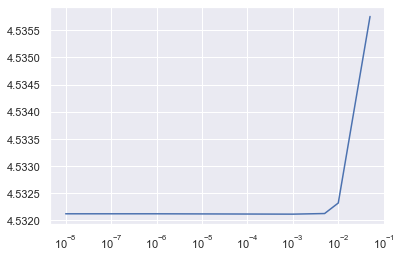

In [109]:
alphas_lasso = [1e-8, 1e-7, 0.000001, 0.001, 0.005, 0.01, 0.05]
rmse_lasso = []
for alpha in alphas_lasso:
    lasso = Lasso(alpha = alpha)
    lasso.fit(X_train, y_train)
    rmse_lasso.append(sqrt(mean_squared_error(y_test, lasso.predict(X_test))))

print('alpha optimal : ', alphas_lasso[rmse_lasso.index(min(rmse_lasso))])

plt.figure()
plt.plot(alphas_lasso,rmse_lasso)
plt.xscale('log')
plt.show()

In [110]:
min(rmse_lasso)

4.532113951978823

In [111]:
min(rmse)

4.5318259245459345

In [112]:
lasso_optimal = Lasso(alpha = 1e-8)
lasso_optimal.fit(X_train, y_train)

C:\Users\matth\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1326334.6136932613, tolerance: 720.7123448432359
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=1e-08)

In [113]:
print('R² sur jeu d\'entraînement : ', lasso_optimal.score(X_train,y_train))
print('R² sur jeu de test', lasso_optimal.score(X_test,y_test))
print('Poids de chaque variable dans la régression', lasso_optimal.coef_)
print('ordonnée à l\'origine', lasso_optimal.intercept_)

R² sur jeu d'entraînement :  0.6317559428554937
R² sur jeu de test 0.6295590102479924
Poids de chaque variable dans la régression [ 1.57641021 -0.52113884  4.24911964  0.1713879   2.84446553 -0.24241888
  2.71048698  0.04079177]
ordonnée à l'origine 11.923568203586038


# Elasticnet

In [114]:
from sklearn.linear_model import ElasticNet
en = ElasticNet(alpha = .01, l1_ratio = 0.9)
en.fit(X_train, y_train)
print('RMSE :' , sqrt(mean_squared_error(y_test, en.predict(X_test))))

RMSE : 4.532067818416601


In [115]:
print('R² sur jeu de test', en.score(X_test,y_test))

R² sur jeu de test 0.6295676359474973


# Random Forest Regressor

In [117]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [50],
    'verbose' : [1]
}

rfr = GridSearchCV(RandomForestRegressor(), params, cv = 5)

In [118]:
rfr.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   15.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   15.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   15.4s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [50], 'verbose': [1]})

In [119]:
rfr.best_estimator_

RandomForestRegressor(n_estimators=50, verbose=1)

In [120]:
print('R² sur jeu d\'entraînement : ', rfr.best_estimator_.score(X_train,y_train))
print('R² sur jeu de test', rfr.best_estimator_.score(X_test,y_test))


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


R² sur jeu d'entraînement :  0.986398626296614
R² sur jeu de test 0.9285330751219496


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.3s finished


In [121]:
print('RMSE = ', sqrt(mean_squared_error(y_test, rfr.best_estimator_.predict(X_test))))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


RMSE =  1.9906480653968384


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.4s finished


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.4s finished


(-1.4000000000000001, 29.4, -2.6718662487442977, 56.10919122363025)

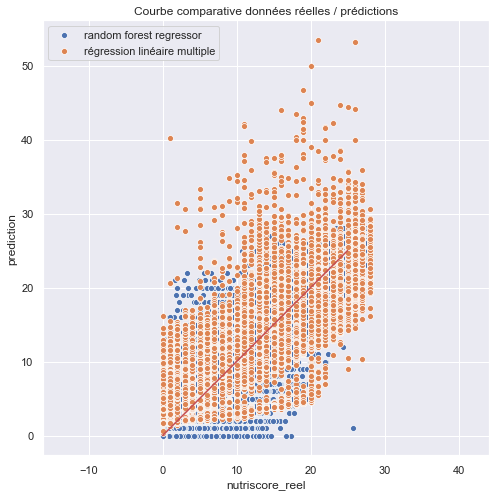

In [122]:
plt.figure(figsize=(8,8))
plt.title('Courbe comparative données réelles / prédictions')
sns.scatterplot(x = rfr.predict(X_test),y = y_test)
sns.scatterplot(x = resultat['nutriscore_reel'], y = resultat['prediction'])
plt.legend(['random forest regressor', 'régression linéaire multiple'])
sns.lineplot([0,25],[0,25], color='r')
ax = plt.gca()
ax.set_xlim(0,25)
ax.set_ylim(0,25)
ax.axis('equal')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.4s finished


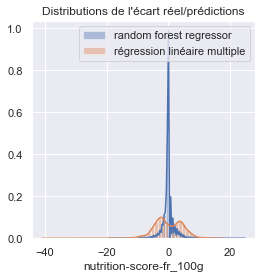

In [123]:
plt.figure(figsize=(4,4))
plt.title('Distributions de l\'écart réel/prédictions')
sns.distplot(rfr.predict(X_test) -  y_test)
sns.distplot(resultat['nutriscore_reel'] - resultat['prediction'])
plt.legend(['random forest regressor', 'régression linéaire multiple'])

In [124]:
rfr.best_estimator_.feature_importances_

array([0.10703188, 0.01368239, 0.48372504, 0.01466895, 0.16996579,
       0.03081604, 0.10000556, 0.08010434])

In [125]:
random_forest_features = pd.DataFrame({'feature' : data_reg.drop(['nutrition-score-fr_100g'],axis=1).columns,
                                      'importance' : rfr.best_estimator_.feature_importances_})

In [126]:
random_forest_features.sort_values(by='importance',ascending=False, inplace=True)

<AxesSubplot:title={'center':'Importance des variables dans le random forest'}, xlabel='importance', ylabel='feature'>

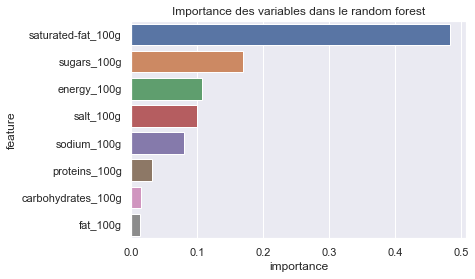

In [127]:
plt.title('Importance des variables dans le random forest')

sns.barplot(y = random_forest_features['feature'], x=random_forest_features['importance'])

# QUESTION 5 : Rédiger un rapport d’exploration et pitcher votre idée durant la soutenance du projet : voir support de présentation